In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import patches
from scipy import stats
import seaborn as sns
%matplotlib inline

In [2]:
plt.style.use('seaborn-white')

In [3]:
SMALL_SIZE = 7
MEDIUM_SIZE = 8
LARGE_SIZE = 10
BIGGER_SIZE = 12
plt.rc('font', size=LARGE_SIZE)     
plt.rc('axes', titlesize=MEDIUM_SIZE)    
plt.rc('axes', labelsize=MEDIUM_SIZE)    
plt.rc('axes', linewidth=0.5) 
plt.rc('xtick', labelsize=SMALL_SIZE)    
plt.rc('ytick', labelsize=SMALL_SIZE) 
plt.rc('legend', fontsize=MEDIUM_SIZE)    
plt.rc('figure', titlesize=BIGGER_SIZE, dpi=300, figsize=(5,4) )  

In [4]:
path_to_data="../data/"
path_to_results="../results/"

In [5]:
plt_df=pd.read_csv(path_to_data+"Data_for_Figure2_3A.tsv",sep="\t",index_col=0)
plt_df

,CancerType,SEX,sTP53_mutdel,Gender_sTP53m,HA_cases,BRCA12_alteration,HRR_alteration_type,BRCA1_methylation,gATM_LOH,gATR_LOH,...,sNBN_nonLOH,sPALB2_nonLOH,sRAD50_nonLOH,sRAD51B_nonLOH,sRAD51C_nonLOH,sRAD51D_nonLOH,sRAD51_nonLOH,sRAD52_nonLOH,HRD_score,MSK_Sig3_ratio
P10001,BRC,Female,1.0,Female_TP53m,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,2.774037e-08
P10002,LGG,Male,1.0,Male_TP53m,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,1.665269e-01
P10003,HNSC,Male,0.0,Male_TP53wt,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,1.644319e-04
P10004,UCEC,Female,0.0,Female_TP53wt,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,1.926812e-08
P10005,STES,Male,1.0,Male_TP53m,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,8.843827e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P19842,UCEC,Female,0.0,Female_TP53wt,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.085928e-07
P19843,THCA,Female,0.0,Female_TP53wt,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.946925e-08
P19844,LUSC,Female,1.0,Female_TP53m,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,1.375988e-01
P19846,PAAD,Male,1.0,Male_TP53m,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0,2.806318e-02


# Figure 2A

In [6]:
from collections import Counter
dict_cancer_count=Counter(plt_df["CancerType"])
dict_cancer_count

Counter({'BRC': 1009,
         'LGG': 509,
         'HNSC': 502,
         'UCEC': 515,
         'STES': 618,
         'THCA': 484,
         'SKCM': 438,
         'CRC': 525,
         'KRC': 695,
         'LUSC': 469,
         'SARC': 234,
         'BLCA': 410,
         'GBM': 385,
         'PCPG': 178,
         'PRAD': 493,
         'PAAD': 176,
         'LUAD': 510,
         'OV': 409,
         'ACC': 91,
         'UCS': 57,
         'LIHC': 358,
         'CESC': 281,
         'UVM': 80,
         'MESO': 82,
         'TGCT': 128,
         'CHOL': 36})

In [7]:
cancer_mean_hrd=plt_df.groupby("CancerType").mean()[["HRD_score"]]
cancer_mean_hrd

,HRD_score
CancerType,
ACC,12.247191
BLCA,27.842893
BRC,25.602261
CESC,20.212230
CHOL,21.861111
CRC,12.583493
GBM,8.347826
HNSC,24.315682
KRC,4.345534


In [8]:
cancer_mean_sig3=plt_df.groupby("CancerType").mean()[["MSK_Sig3_ratio"]]
cancer_mean_sig3

,MSK_Sig3_ratio
CancerType,
ACC,0.120918
BLCA,0.039348
BRC,0.112847
CESC,0.028883
CHOL,0.092376
CRC,0.042570
GBM,0.081553
HNSC,0.047339
KRC,0.174957


In [9]:
mut_by_cancer=plt_df.groupby("CancerType").sum()
mut_by_cancer

,sTP53_mutdel,HA_cases,BRCA12_alteration,BRCA1_methylation,gATM_LOH,gATR_LOH,gBARD1_LOH,gBRCA1_LOH,gBRCA2_LOH,gBRIP1_LOH,...,sNBN_nonLOH,sPALB2_nonLOH,sRAD50_nonLOH,sRAD51B_nonLOH,sRAD51C_nonLOH,sRAD51D_nonLOH,sRAD51_nonLOH,sRAD52_nonLOH,HRD_score,MSK_Sig3_ratio
CancerType,,,,,,,,,,,,,,,,,,,,,
ACC,18.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1090.0,11.003564
BLCA,201.0,29.0,7.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,2.0,1.0,2.0,0.0,3.0,0.0,0.0,0.0,11165.0,16.093245
BRC,346.0,116.0,79.0,26.0,9.0,1.0,1.0,19.0,11.0,1.0,...,1.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,24911.0,113.636694
CESC,22.0,10.0,5.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5619.0,8.116144
CHOL,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,787.0,3.325552
CRC,310.0,12.0,2.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,7.0,3.0,4.0,1.0,1.0,0.0,0.0,1.0,6556.0,22.349260
GBM,121.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3072.0,31.153225
HNSC,357.0,9.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0,11939.0,23.716968
KRC,38.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,2968.0,121.594946


In [10]:
germline_hrr_all=set( x.replace("_LOH","").replace("_nonLOH","") for x in plt_df.columns[ plt_df.columns.str.contains("g.*LOH")]  )
somatic_hrr_all=set( x.replace("_LOH","").replace("_nonLOH","") for x in plt_df.columns[ plt_df.columns.str.contains("s.*LOH")]  )
germline_hrr_all

{'gATM',
 'gATR',
 'gBARD1',
 'gBLM',
 'gBRCA1',
 'gBRCA2',
 'gBRIP1',
 'gCHEK2',
 'gFANCA',
 'gFANCC',
 'gFANCE',
 'gFANCI',
 'gFANCM',
 'gNBN',
 'gPALB2',
 'gRAD50',
 'gRAD51C',
 'gRAD51D'}

In [11]:
g_loh=mut_by_cancer.reindex( [ x+"_LOH" for x in sorted(germline_hrr_all)],axis=1).fillna(0)
g_nloh=mut_by_cancer.reindex( [ x+"_nonLOH" for x in sorted(germline_hrr_all)],axis=1).fillna(0)
s_loh=mut_by_cancer.reindex(  [x+"_LOH" for x in sorted(somatic_hrr_all)],axis=1 ).fillna(0)
s_nloh=mut_by_cancer.reindex(  [x+"_nonLOH" for x in sorted(somatic_hrr_all)],axis=1 ).fillna(0)

In [12]:
g_total=np.add(g_loh,g_nloh)
g_loh_ratio=np.divide( g_loh, g_total).fillna(0)
n_cancer= [ dict_cancer_count[cancer] for cancer in g_total.index]
g_mut_ratio=g_total.apply(lambda x: np.divide(x, n_cancer))*100

s_total=np.add(s_loh,s_nloh)
s_loh_ratio=np.divide( s_loh, s_total).fillna(0)
n_cancer= [ dict_cancer_count[cancer] for cancer in s_total.index]
s_mut_ratio=s_total.apply(lambda x: np.divide(x, n_cancer))*100

g_mut_ratio

<ipython-input-12-c9ad82d4d4e1>:1: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  g_total=np.add(g_loh,g_nloh)
<ipython-input-12-c9ad82d4d4e1>:6: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour,

,gATM_LOH,gATR_LOH,gBARD1_LOH,gBLM_LOH,gBRCA1_LOH,gBRCA2_LOH,gBRIP1_LOH,gCHEK2_LOH,gFANCA_LOH,gFANCC_LOH,gFANCE_LOH,gFANCI_LOH,gFANCM_LOH,gNBN_LOH,gPALB2_LOH,gRAD50_LOH,gRAD51C_LOH,gRAD51D_LOH
CancerType,,,,,,,,,,,,,,,,,,
ACC,0.000000,0.000000,0.000000,1.098901,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
BLCA,0.975610,0.243902,0.000000,0.487805,0.243902,0.243902,0.243902,0.975610,0.000000,0.000000,0.000000,0.000000,0.000000,0.243902,0.243902,0.243902,0.487805,0.243902
BRC,0.891972,0.495540,0.099108,0.198216,1.982161,1.783944,0.396432,0.297324,0.099108,0.099108,0.000000,0.000000,0.396432,0.000000,0.198216,0.000000,0.099108,0.000000
CESC,0.000000,0.000000,0.000000,0.355872,0.711744,0.711744,0.355872,0.000000,0.355872,0.000000,0.000000,0.355872,0.711744,0.000000,0.355872,0.000000,0.000000,0.000000
CHOL,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CRC,0.380952,0.571429,0.190476,0.190476,0.190476,0.380952,0.190476,0.190476,0.000000,0.000000,0.000000,0.190476,0.000000,0.000000,0.380952,0.000000,0.000000,0.190476
GBM,0.259740,0.000000,0.000000,0.259740,0.259740,0.000000,0.259740,0.259740,0.000000,0.000000,0.000000,0.000000,0.000000,0.259740,0.259740,0.259740,0.000000,0.000000
HNSC,0.199203,0.199203,0.000000,0.000000,0.000000,0.398406,0.199203,0.000000,0.199203,0.000000,0.000000,0.000000,0.000000,0.000000,0.398406,0.000000,0.000000,0.000000
KRC,0.143885,0.000000,0.000000,0.143885,0.287770,0.143885,0.143885,0.143885,0.000000,0.000000,0.000000,0.000000,0.431655,0.000000,0.000000,0.000000,0.000000,0.000000


In [13]:
g_mutloh_ratio=g_loh_ratio*g_mut_ratio
s_mutloh_ratio=s_loh_ratio*s_mut_ratio
g_mutloh_ratio

,gATM_LOH,gATR_LOH,gBARD1_LOH,gBLM_LOH,gBRCA1_LOH,gBRCA2_LOH,gBRIP1_LOH,gCHEK2_LOH,gFANCA_LOH,gFANCC_LOH,gFANCE_LOH,gFANCI_LOH,gFANCM_LOH,gNBN_LOH,gPALB2_LOH,gRAD50_LOH,gRAD51C_LOH,gRAD51D_LOH
CancerType,,,,,,,,,,,,,,,,,,
ACC,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
BLCA,0.243902,0.000000,0.000000,0.0,0.000000,0.243902,0.000000,0.243902,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.243902
BRC,0.891972,0.099108,0.099108,0.0,1.883053,1.090188,0.099108,0.297324,0.099108,0.0,0.0,0.000000,0.297324,0.0,0.099108,0.0,0.099108,0.000000
CESC,0.000000,0.000000,0.000000,0.0,0.000000,0.711744,0.000000,0.000000,0.000000,0.0,0.0,0.355872,0.000000,0.0,0.000000,0.0,0.000000,0.000000
CHOL,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
CRC,0.190476,0.000000,0.000000,0.0,0.190476,0.190476,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
GBM,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
HNSC,0.000000,0.000000,0.000000,0.0,0.000000,0.199203,0.199203,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
KRC,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.143885,0.0,0.000000,0.0,0.000000,0.000000


In [14]:
sg_loh_ratio=pd.concat([g_loh_ratio,s_loh_ratio],axis=1)
sg_mut_ratio=pd.concat([g_mut_ratio,s_mut_ratio],axis=1)
sg_mutloh_ratio=pd.concat([g_mutloh_ratio,s_mutloh_ratio],axis=1)
sg_mutloh_ratio

,gATM_LOH,gATR_LOH,gBARD1_LOH,gBLM_LOH,gBRCA1_LOH,gBRCA2_LOH,gBRIP1_LOH,gCHEK2_LOH,gFANCA_LOH,gFANCC_LOH,...,sFANCL_LOH,sMRE11A_LOH,sNBN_LOH,sPALB2_LOH,sRAD50_LOH,sRAD51_LOH,sRAD51B_LOH,sRAD51C_LOH,sRAD51D_LOH,sRAD52_LOH
CancerType,,,,,,,,,,,,,,,,,,,,,
ACC,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
BLCA,0.243902,0.000000,0.000000,0.0,0.000000,0.243902,0.000000,0.243902,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.243902,0.0,0.000000,0.0,0.0,0.0
BRC,0.891972,0.099108,0.099108,0.0,1.883053,1.090188,0.099108,0.297324,0.099108,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
CESC,0.000000,0.000000,0.000000,0.0,0.000000,0.711744,0.000000,0.000000,0.000000,0.0,...,0.000000,0.355872,0.000000,0.000000,0.000000,0.0,0.355872,0.0,0.0,0.0
CHOL,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
CRC,0.190476,0.000000,0.000000,0.0,0.190476,0.190476,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
GBM,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
HNSC,0.000000,0.000000,0.000000,0.0,0.000000,0.199203,0.199203,0.000000,0.000000,0.0,...,0.000000,0.199203,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
KRC,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.143885,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0


In [15]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster,cophenet,set_link_color_palette

In [16]:
data=sg_mutloh_ratio
Z = linkage(data, method='average', metric='euclidean')

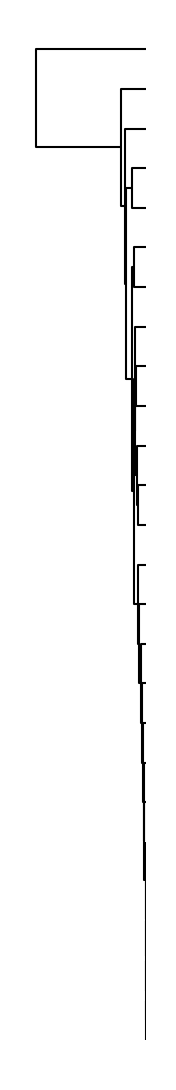

In [17]:
# clustering cancer-axis
set_link_color_palette(["k"])
fig=plt.figure( figsize=(0.5,4.55),facecolor='w')
ax = fig.add_subplot(1,1,1)
# Temporarily override the default line width:
with plt.rc_context({'lines.linewidth': 0.5}):
    d=dendrogram(Z,labels=data.index,leaf_font_size=11
        ,above_threshold_color="k",ax=ax,orientation="left",count_sort=True)#,distance_sort='descending')
ax.set_axis_off()
ax.invert_yaxis()
ax.set_xticks([])

plt.savefig(path_to_results+"Figure2A_1.png",dpi=300,bbox_inches="tight")

In [18]:
for i in d["ivl"]:
    print(i)

OV
BRC
PAAD
ACC
BLCA
CESC
LUSC
SARC
PRAD
STES
SKCM
CRC
LUAD
TGCT
UCEC
LIHC
HNSC
GBM
THCA
KRC
UVM
UCS
PCPG
MESO
CHOL
LGG


In [19]:
# clustering gene-axis
data=sg_mutloh_ratio.T
Z2 = linkage(data, method='average', metric='euclidean')

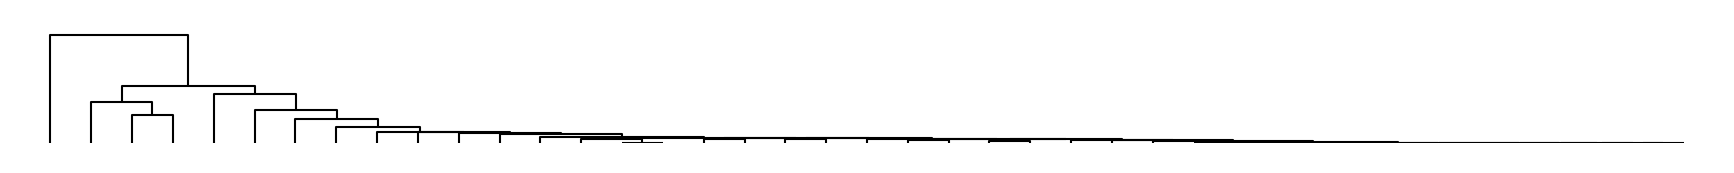

In [20]:
set_link_color_palette(["k"])
fig=plt.figure( figsize=(7.2,0.5),facecolor='w')
ax = fig.add_subplot(1,1,1)
with plt.rc_context({'lines.linewidth': 0.5}):
    d2=dendrogram(Z2,labels=data.index,leaf_font_size=11
        ,above_threshold_color="k",ax=ax,orientation="bottom" ,count_sort=True)
ax.set_axis_off()
ax.invert_yaxis()
ax.set_xticks([])

plt.savefig(path_to_results+"Figure2A_2.png",dpi=300,bbox_inches="tight")

In [21]:
for i in d2["ivl"]:
    print(i)

gBRCA1_LOH
gBRCA2_LOH
sBRCA1_LOH
sCDK12_LOH
sATM_LOH
sBRCA2_LOH
gATM_LOH
sCHEK2_LOH
gBRIP1_LOH
sFANCD2_LOH
gPALB2_LOH
sFANCC_LOH
gRAD51D_LOH
sMRE11A_LOH
gFANCI_LOH
sRAD51B_LOH
gCHEK2_LOH
gFANCM_LOH
sATR_LOH
sBRIP1_LOH
sRAD50_LOH
sBARD1_LOH
sBLM_LOH
gRAD51C_LOH
sPALB2_LOH
sFANCA_LOH
sFANCL_LOH
sNBN_LOH
sCHEK1_LOH
gFANCA_LOH
gATR_LOH
gBARD1_LOH
sRAD52_LOH
sRAD51D_LOH
sRAD51C_LOH
sRAD51_LOH
gRAD50_LOH
gNBN_LOH
gFANCE_LOH
gBLM_LOH
gFANCC_LOH


In [22]:
sg_loh_ratio_order=sg_loh_ratio.loc[d["ivl"],d2["ivl"]]
sg_mut_ratio_order=sg_mut_ratio.loc[d["ivl"],d2["ivl"]]

In [23]:
coolwarm=plt.get_cmap("coolwarm")

OV (409)
BRC (1009)
PAAD (176)
ACC (91)
BLCA (410)
CESC (281)
LUSC (469)
SARC (234)
PRAD (493)
STES (618)
SKCM (438)
CRC (525)
LUAD (510)
TGCT (128)
UCEC (515)
LIHC (358)
HNSC (502)
GBM (385)
THCA (484)
KRC (695)
UVM (80)
UCS (57)
PCPG (178)
MESO (82)
CHOL (36)
LGG (509)


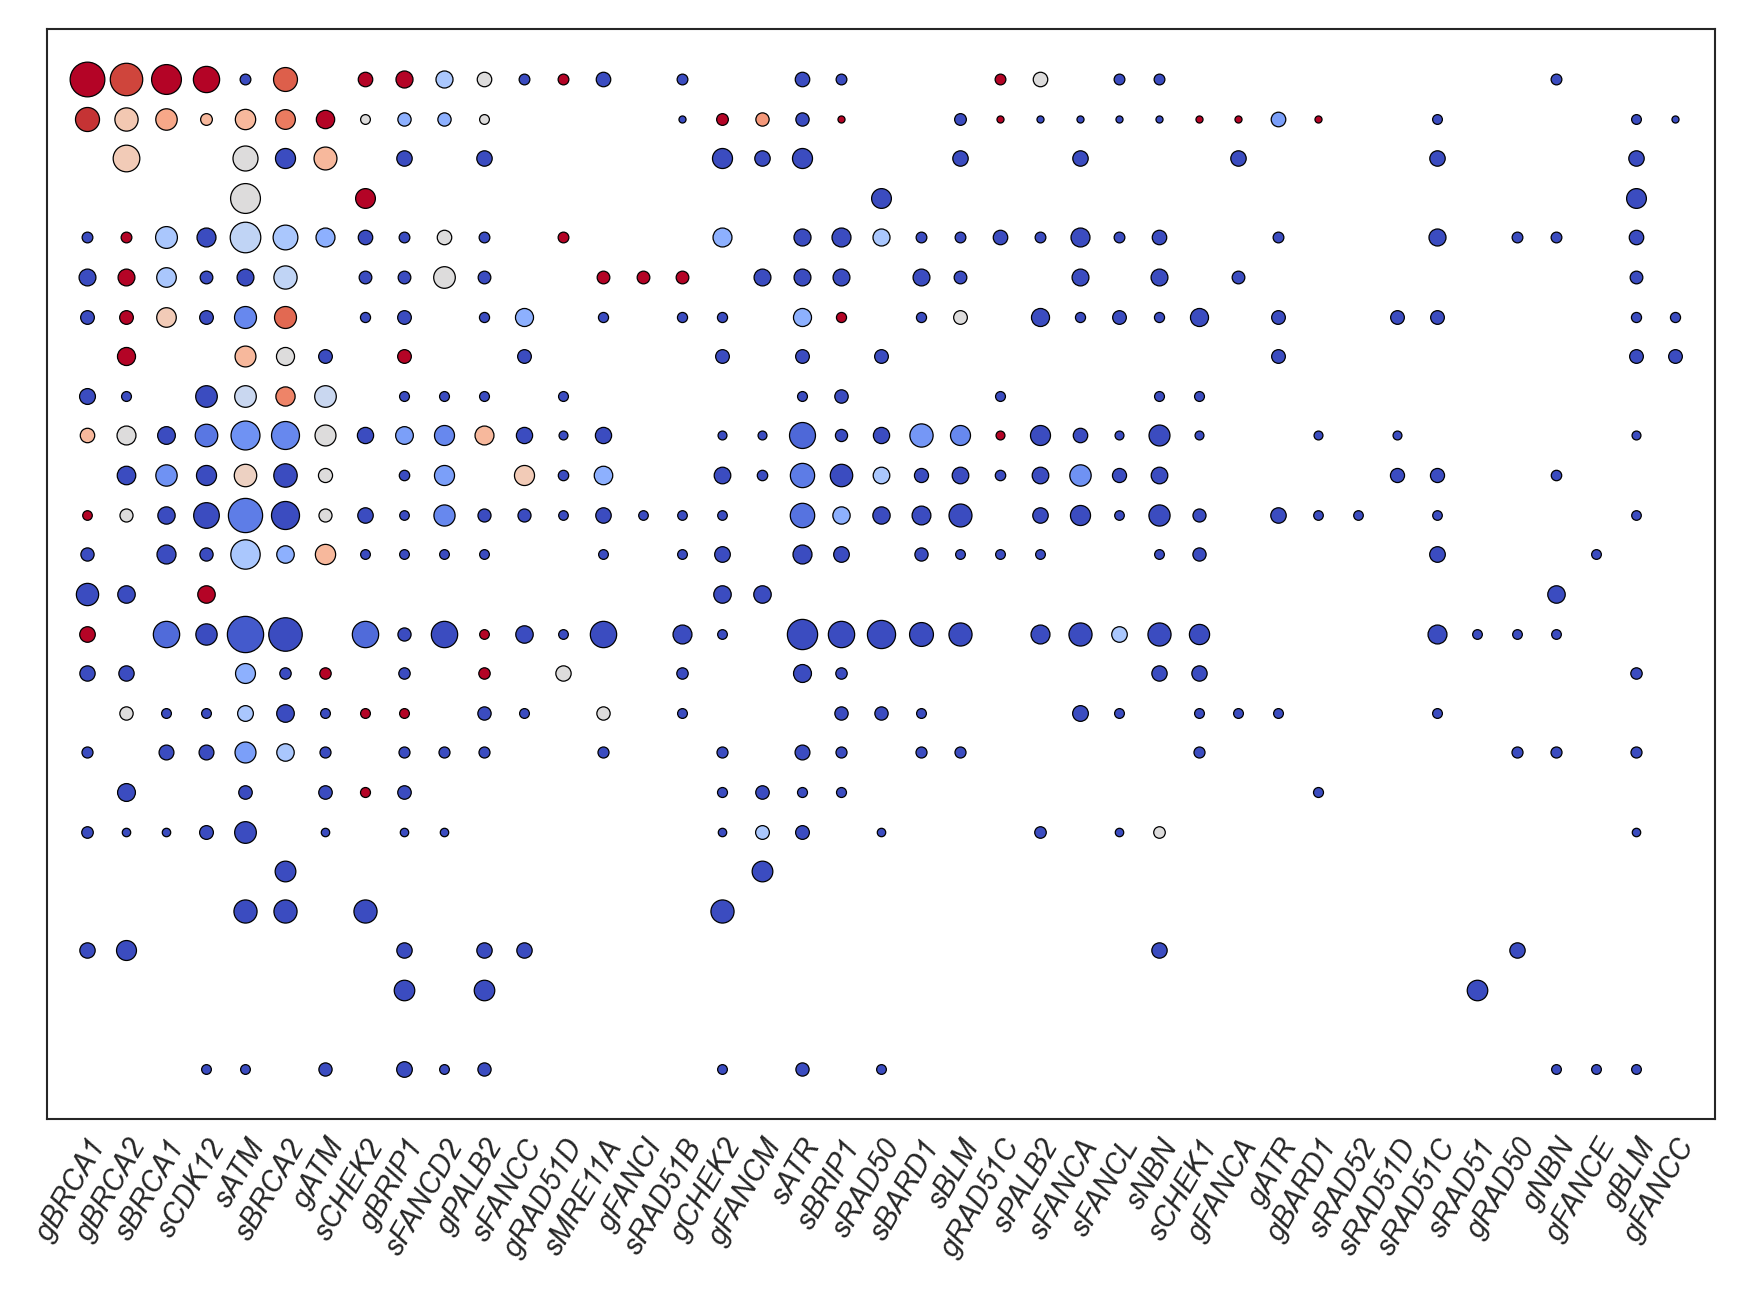

In [24]:
plt_df2=sg_loh_ratio_order.T.iloc[:,::-1]
plt_df3=sg_mut_ratio_order.T.iloc[:,::-1]
nrows,ncols=plt_df2.shape
fig = plt.figure(figsize=(nrows*0.175,ncols*0.185))
ax = fig.add_subplot(1,1,1)

# scatter plot
for nrow in range(nrows):
    for ncol in range(ncols):
        loh_ratio=plt_df2.iloc[nrow,ncol]
        mut_ratio=plt_df3.iloc[nrow,ncol]
        color= coolwarm( int(256*loh_ratio) )
        size=np.log10(mut_ratio+1) *70
        ax.scatter(x=nrow,y=ncol, s=size, c=[color], 
                   vmin=0,vmax=1,edgecolors="k", linewidths=0.3)

ax.set_xlim(-1,nrows)   
ax.set_xticks(range(nrows))
xticklabels=[x.replace("_LOH","") for x in plt_df2.index]
ax.set_xticklabels(xticklabels,fontsize=SMALL_SIZE, rotation=60,
                   ha="right",style="italic",rotation_mode="anchor" )
yticklabels=[ cancer +" ("+str(dict_cancer_count[cancer])+")" for cancer in plt_df2.columns]
ax.set_yticklabels([])#yticklabels,fontsize=15,ha="left",position=(-0.35,1))
for label in yticklabels[::-1]:
    print(label )

#ax.invert_yaxis()

plt.savefig(path_to_results+"Figure2A_3.png",bbox_inches="tight")

In [25]:
sg_loh_ratio.to_csv(path_to_results+"Figure2A_HRR_LOH_ratio_by_cancer.tsv",sep="\t")
sg_mut_ratio.to_csv(path_to_results+"Figure2A_HRR_mut_ratio_by_cancertype.tsv",sep="\t")

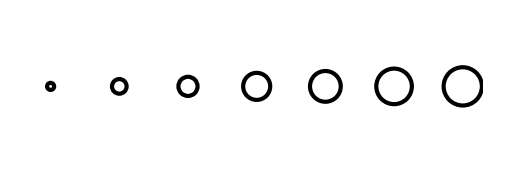

In [26]:
fig = plt.figure(figsize=(1.95,0.5))
ax = fig.add_subplot(1,1,1)

percentages= [ 0.1,0.5,1,3,5,10,15]
x=[1]*len(percentages)
y=np.arange(1,1.5*len(percentages),1.5)
sizes=[ np.log10(x+1)*70 for x in percentages]
ax.scatter(y,x,s=sizes,c="w",marker="o",edgecolors="k", linewidths=1)
ax.set_axis_off()

plt.savefig(path_to_results+"Figure2A_4.png",bbox_inches="tight")

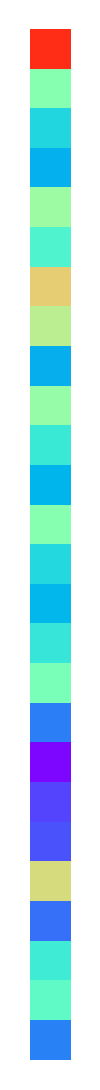

In [27]:
cancer_mean_hrd_order=cancer_mean_hrd.loc[d["ivl"],:]
fig = plt.figure(figsize=(0.175,len(cancer_mean_hrd)*0.175))
ax = fig.add_subplot(1,1,1)
sns.heatmap( cancer_mean_hrd_order,cmap="rainbow",cbar=False,vmin=0,vmax=50)
ax.set_axis_off()
plt.savefig(path_to_results+"Figure2A_5.png",bbox_inches="tight")

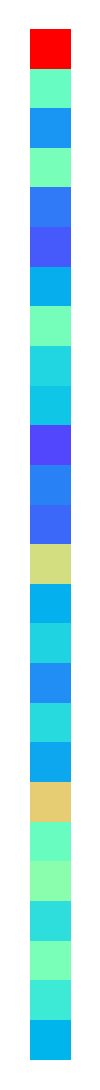

In [28]:
cancer_mean_sig3_order=cancer_mean_sig3.loc[d["ivl"],:]
fig = plt.figure(figsize=(0.175,len(cancer_mean_sig3)*0.175))
ax = fig.add_subplot(1,1,1)
sns.heatmap( cancer_mean_sig3_order,cmap="rainbow",cbar=False,vmin=0,vmax=0.25)
ax.set_axis_off()
plt.savefig(path_to_results+"Figure2A_6.png",bbox_inches="tight")

# Figure 2B

In [29]:
plt_df2= pd.concat( [plt_df[["CancerType"]], pd.get_dummies(plt_df["HRR_alteration_type"])],sort=False,axis=1)
plt_df2=plt_df2.drop(["0"],axis=1)
plt_df2

,CancerType,ATM,BRCA12,BRCA1_methylation,Combined,Other_HRR
P10001,BRC,0,0,0,0,0
P10002,LGG,0,0,0,0,0
P10003,HNSC,0,0,0,0,0
P10004,UCEC,0,0,0,0,0
P10005,STES,0,0,0,0,0
...,...,...,...,...,...,...
P19842,UCEC,0,0,0,0,0
P19843,THCA,0,0,0,0,0
P19844,LUSC,0,0,0,0,0
P19846,PAAD,0,0,0,0,0


In [30]:
count_per_cancer=plt_df2.groupby("CancerType").sum()
count_per_cancer

,ATM,BRCA12,BRCA1_methylation,Combined,Other_HRR
CancerType,,,,,
ACC,2,0,0,0,1
BLCA,9,6,1,0,13
BRC,16,48,24,7,21
CESC,0,5,0,0,5
CHOL,0,0,0,0,0
CRC,6,2,0,0,4
GBM,1,1,0,0,0
HNSC,1,1,1,0,6
KRC,0,0,0,0,2


In [31]:
# exclude count <=2
count_per_cancer=count_per_cancer.loc[ np.sum(count_per_cancer,axis=1)>=3,:]
count_per_cancer

,ATM,BRCA12,BRCA1_methylation,Combined,Other_HRR
CancerType,,,,,
ACC,2,0,0,0,1
BLCA,9,6,1,0,13
BRC,16,48,24,7,21
CESC,0,5,0,0,5
CRC,6,2,0,0,4
HNSC,1,1,1,0,6
LIHC,2,0,0,0,3
LUAD,11,1,0,0,2
LUSC,1,11,2,0,7


In [32]:
from collections import Counter
dict_cancer_count=Counter(plt_df["CancerType"])
n_cancer=[ dict_cancer_count[cancer] for cancer in count_per_cancer.index]
n_cancer

[91,
 410,
 1009,
 281,
 525,
 502,
 358,
 510,
 469,
 409,
 176,
 493,
 234,
 438,
 618,
 128,
 515]

In [33]:
ratio_per_cancer=count_per_cancer.apply(lambda x: np.divide(x,n_cancer))*100
ratio_per_cancer

,ATM,BRCA12,BRCA1_methylation,Combined,Other_HRR
CancerType,,,,,
ACC,2.197802,0.000000,0.000000,0.000000,1.098901
BLCA,2.195122,1.463415,0.243902,0.000000,3.170732
BRC,1.585728,4.757185,2.378593,0.693756,2.081269
CESC,0.000000,1.779359,0.000000,0.000000,1.779359
CRC,1.142857,0.380952,0.000000,0.000000,0.761905
HNSC,0.199203,0.199203,0.199203,0.000000,1.195219
LIHC,0.558659,0.000000,0.000000,0.000000,0.837989
LUAD,2.156863,0.196078,0.000000,0.000000,0.392157
LUSC,0.213220,2.345416,0.426439,0.000000,1.492537


In [34]:
cancer_ratio_order=np.sum(ratio_per_cancer,axis=1).sort_values(ascending=False).index
col_order=["BRCA12","BRCA1_methylation","ATM","Other_HRR","Combined"]

OV (122/409)
TGCT (16/128)
BRC (116/1009)
BLCA (29/410)
STES (33/618)
LUSC (21/469)
SARC (10/234)
PAAD (7/176)
SKCM (16/438)
CESC (10/281)
ACC (3/91)
UCEC (16/515)
PRAD (14/493)
LUAD (14/510)
CRC (12/525)
HNSC (9/502)
LIHC (5/358)


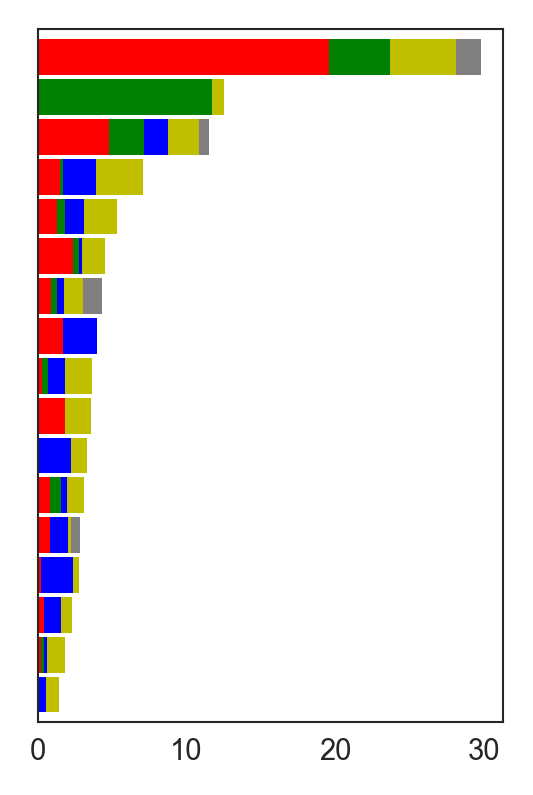

In [35]:
plt_df3=ratio_per_cancer.loc[cancer_ratio_order,col_order ]

N=len(plt_df3)
fig = plt.figure(figsize=(2.0,N*0.18))
ax = fig.add_subplot(1,1,1)
plt_df3.plot.barh(stacked=True,width=0.9,lw=0,color=["r","g","b","y","grey"],ax=ax)
ax.set_title('',fontsize=16)
ax.set_xlabel('',fontsize=15)
ax.set_yticklabels([],fontsize=15)
ax.set_ylabel('',fontsize=15)

ax.tick_params(labelsize=SMALL_SIZE)
#ax.margins(.01)
ax.invert_yaxis()
for i in plt_df3.index:
    print(i+" ({}/{})".format( np.sum(count_per_cancer.loc[i]), dict_cancer_count[i] ) )
    
ax.legend([])
plt.savefig(path_to_results+"Figure2B.png",bbox_inches="tight")

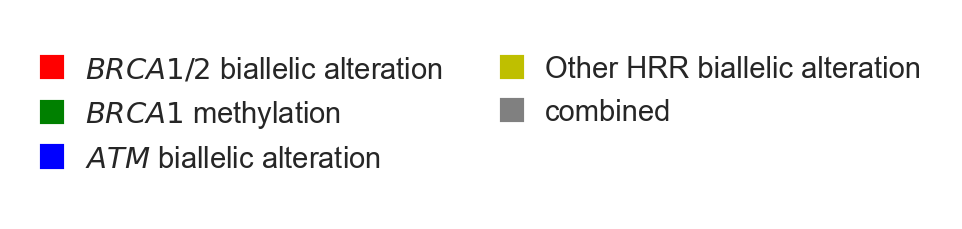

In [36]:
from matplotlib.patches import Patch
lg_labels=["$BRCA1/2$ biallelic alteration","$BRCA1$ methylation",
           "$ATM$ biallelic alteration","Other HRR biallelic alteration","combined"]
lg_rgbs=["r","g","b","y","grey"]
lg_number=5
custom_legends=[ Patch(facecolor=lg_rgbs[i],edgecolor=lg_rgbs[i],label=lg_labels[i])
                 for i in range(lg_number) ]
# plot
plt.figure(figsize=(2,0.75))
plt.legend(handles=custom_legends,loc="center",title="",fontsize=SMALL_SIZE,
           frameon=False,ncol=2,handlelength=0.7)
plt.gca().set_axis_off()

# Figure 2C & 3A

In [37]:
dict_cancer_color={
'ACC': (0.807843137254902, 0.42745098039215684, 0.7411764705882353),
 'BLCA': (0.3215686274509804, 0.32941176470588235, 0.6392156862745098),
 'BRC': (0.19215686274509805, 0.5098039215686274, 0.7411764705882353),
 'CESC': (0.4196078431372549, 0.43137254901960786, 0.8117647058823529),
 'CHOL': (0.2235294117647059, 0.23137254901960785, 0.4745098039215686),
 'CRC': (0.38823529411764707, 0.4745098039215686, 0.2235294117647059),
 'ESCA': (0.9019607843137255, 0.3333333333333333, 0.050980392156862744),
 'GBM': (0.6313725490196078, 0.8509803921568627, 0.6078431372549019),
 'HNSC': (0.7803921568627451, 0.9137254901960784, 0.7529411764705882),
 'KRC': (1.0, 1.0, 0.6),
 'LGG': (0.8705882352941177, 0.6196078431372549, 0.8392156862745098),
 'LIHC': (0.5176470588235295, 0.23529411764705882, 0.2235294117647059),
 'LUAD': (0.6784313725490196, 0.28627450980392155, 0.2901960784313726),
 'LUSC': (0.9411764705882353, 0.00784313725490196, 0.4980392156862745),
 'MESO': (0.9058823529411765, 0.5882352941176471, 0.611764705882353),
 'OV': (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 'PAAD': (0.4823529411764706, 0.2549019607843137, 0.45098039215686275),
 'PCPG': (0.6470588235294118, 0.3176470588235294, 0.5803921568627451),
 'PRAD': (0.611764705882353, 0.6196078431372549, 0.8705882352941177),
 'SARC': (0.7411764705882353, 0.6196078431372549, 0.2235294117647059),
 'SKCM': (0.6196078431372549, 0.792156862745098, 0.8823529411764706),
 'STES': (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 'TGCT': (0.19215686274509805, 0.6392156862745098, 0.32941176470588235),
 'THCA': (0.7764705882352941, 0.8588235294117647, 0.9372549019607843),
 'UCEC': (0.9921568627450981, 0.5529411764705883, 0.23529411764705882),
 'UCS': (0.4549019607843137, 0.7686274509803922, 0.4627450980392157),
 'UVM': (0.9921568627450981, 0.6823529411764706, 0.4196078431372549),
'Others': 'grey'}

In [38]:
mean_by_cancer=plt_df.groupby("CancerType").mean()[["sTP53_mutdel","HRD_score","MSK_Sig3_ratio"]]
mean_by_cancer

,sTP53_mutdel,HRD_score,MSK_Sig3_ratio
CancerType,,,
ACC,0.197802,12.247191,0.120918
BLCA,0.490244,27.842893,0.039348
BRC,0.342914,25.602261,0.112847
CESC,0.078292,20.212230,0.028883
CHOL,0.111111,21.861111,0.092376
CRC,0.590476,12.583493,0.042570
GBM,0.314286,8.347826,0.081553
HNSC,0.711155,24.315682,0.047339
KRC,0.054676,4.345534,0.174957


In [39]:
# remove number of HA cases <=2
ha_cases_count_per_cancer=plt_df.groupby("CancerType").sum()["HA_cases"]
selected_cancer=ha_cases_count_per_cancer[ha_cases_count_per_cancer>=3].index

/Users/takamatsushiro/.pyenv/versions/3.8.6/envs/default/lib/python3.8/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


rS = 0.682, p = 1.24e-04


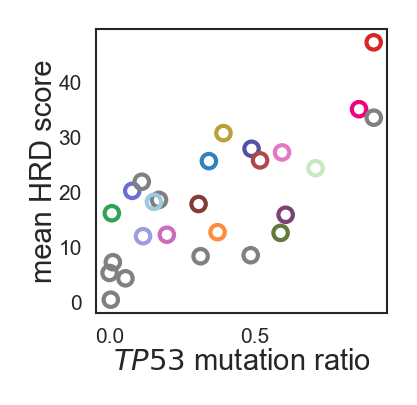

In [40]:
fig = plt.figure(figsize=(1.25,1.25))
ax = fig.add_subplot(1,1,1)
plt_df2=mean_by_cancer
x="sTP53_mutdel"
y="HRD_score"
cancers=plt_df2.index
colors=[ dict_cancer_color[ cancer] if cancer in selected_cancer else "grey" for cancer in cancers]

ax.scatter( plt_df2[x],plt_df2[y],c="None",edgecolors=colors,linewidth=1,s=12)
ax.set_title('',fontsize=16)
ax.set_ylabel('mean HRD score',fontsize=SMALL_SIZE,labelpad=0.1)
ax.set_xlabel('$TP53$ mutation ratio',fontsize=SMALL_SIZE,labelpad=0.2)
ax.tick_params(labelsize=SMALL_SIZE-2)
r,p=stats.spearmanr(plt_df2[x],plt_df2[y])
print("rS = {:.3g}, p = {:.2e}".format(r,p))

plt.savefig(path_to_results+"Figure2C_1.png",bbox_inches="tight")

rS = -0.166, p = 4.18e-01


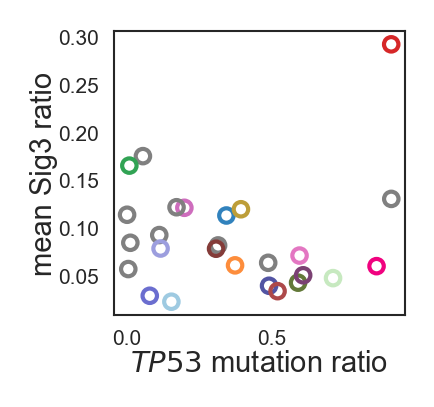

In [41]:
fig = plt.figure(figsize=(1.25,1.25))
ax = fig.add_subplot(1,1,1)
plt_df2=mean_by_cancer
x="sTP53_mutdel"
y="MSK_Sig3_ratio"
cancers=plt_df2.index
colors=[ dict_cancer_color[ cancer] if cancer in selected_cancer else "grey" for cancer in cancers]

ax.scatter( plt_df2[x],plt_df2[y],c="None",edgecolors=colors,linewidth=1,s=12)
ax.set_title('',fontsize=16)
ax.set_ylabel('mean Sig3 ratio',fontsize=SMALL_SIZE,labelpad=0.1)
ax.set_xlabel('$TP53$ mutation ratio',fontsize=SMALL_SIZE,labelpad=0.2)
ax.tick_params(labelsize=SMALL_SIZE-2)
r,p=stats.spearmanr(plt_df2[x],plt_df2[y])
print("rS = {:.3g}, p = {:.2e}".format(r,p))

plt.savefig(path_to_results+"Figure2C_2.png",bbox_inches="tight")

In [42]:
value="HRD_score"
plt_df3=plt_df.dropna(subset=[value])
PPP=plt_df3.loc[ (plt_df3["BRCA12_alteration"]==1) & (plt_df3["Gender_sTP53m"]=="Female_TP53m"), value].values
PPN=plt_df3.loc[ (plt_df3["BRCA12_alteration"]==1) & (plt_df3["Gender_sTP53m"]=="Male_TP53m"), value].values
PNP=plt_df3.loc[ (plt_df3["BRCA12_alteration"]==1) & (plt_df3["Gender_sTP53m"]=="Female_TP53wt"), value].values
PNN=plt_df3.loc[ (plt_df3["BRCA12_alteration"]==1) & (plt_df3["Gender_sTP53m"]=="Male_TP53wt"), value].values
NPP=plt_df3.loc[ (plt_df3["BRCA12_alteration"]!=1) & (plt_df3["Gender_sTP53m"]=="Female_TP53m"), value].values
NPN=plt_df3.loc[ (plt_df3["BRCA12_alteration"]!=1) & (plt_df3["Gender_sTP53m"]=="Male_TP53m"), value].values
NNP=plt_df3.loc[ (plt_df3["BRCA12_alteration"]!=1) & (plt_df3["Gender_sTP53m"]=="Female_TP53wt"), value].values
NNN=plt_df3.loc[ (plt_df3["BRCA12_alteration"]!=1) & (plt_df3["Gender_sTP53m"]=="Male_TP53wt"), value].values
data_comp=[PPP,PPN,PNP,PNN,NPP,NPN,NNP,NNN]

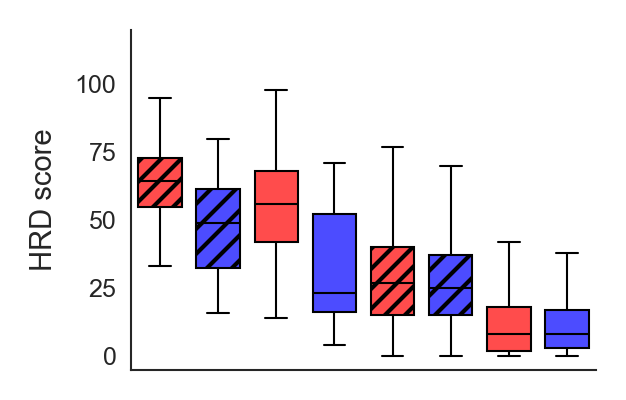

In [43]:
fig = plt.figure(figsize=(2,1.5))
ax = fig.add_subplot(1,1,1)
bp=ax.boxplot(data_comp, showfliers=False,patch_artist=True, 
              widths=0.75)
colors=[(1,0,0,0.7),(0,0,1,0.7)]*4
hatches=["/////","////","",""]*2
# box face color
for b, c,h in zip(bp['boxes'], colors, hatches):
    b.set(linewidth=0.5) 
    b.set(hatch=h) 
    b.set(facecolor=c)
    b.set(edgecolor="k")
# median line
for b, c in zip(bp['medians'], colors):
    b.set(color="k",linewidth=0.5)
for b, c in zip(bp['whiskers'], colors*2):
    b.set(linewidth=0.5)
# caps
for b, c in zip(bp['caps'], colors*2):
    b.set( linewidth=0.5)

ax.set_xlabel('')
ax.set_xticklabels([])
ax.set_ylim(-5,120)
ax.tick_params(labelsize=6)

ax.set_ylabel("HRD score",fontsize=SMALL_SIZE)
ax.spines['top'].set_visible(False)
ax.spines['right' ].set_visible(False)

plt.savefig(path_to_results+"Figure3A_1_1.png",bbox_inches="tight")

In [44]:
_,p1=stats.mannwhitneyu(PPP,PPN)
_,p2=stats.mannwhitneyu(PNP,PNN)
_,p3=stats.mannwhitneyu(NPP,NPN)
_,p4=stats.mannwhitneyu(NNP,NNN)
_,p12=stats.mannwhitneyu( np.concatenate([PPP,PPN]),   np.concatenate([PNP,PNN])  )
_,p34=stats.mannwhitneyu( np.concatenate([NPP,NPN]),   np.concatenate([NNP,NNN])  )
for p in [p1,p2,p3,p4,p12,p34]:
    print( "p = {:.2e}".format(p) )

p = 3.96e-05
p = 2.65e-05
p = 4.14e-03
p = 1.24e-02
p = 8.69e-10
p = 0.00e+00


In [45]:
value="MSK_Sig3_ratio"
plt_df3=plt_df.dropna(subset=[value])
PPP=plt_df3.loc[ (plt_df3["BRCA12_alteration"]==1) & (plt_df3["Gender_sTP53m"]=="Female_TP53m"), value].values
PPN=plt_df3.loc[ (plt_df3["BRCA12_alteration"]==1) & (plt_df3["Gender_sTP53m"]=="Male_TP53m"), value].values
PNP=plt_df3.loc[ (plt_df3["BRCA12_alteration"]==1) & (plt_df3["Gender_sTP53m"]=="Female_TP53wt"), value].values
PNN=plt_df3.loc[ (plt_df3["BRCA12_alteration"]==1) & (plt_df3["Gender_sTP53m"]=="Male_TP53wt"), value].values
NPP=plt_df3.loc[ (plt_df3["BRCA12_alteration"]==0) & (plt_df3["Gender_sTP53m"]=="Female_TP53m"), value].values
NPN=plt_df3.loc[ (plt_df3["BRCA12_alteration"]==0) & (plt_df3["Gender_sTP53m"]=="Male_TP53m"), value].values
NNP=plt_df3.loc[ (plt_df3["BRCA12_alteration"]==0) & (plt_df3["Gender_sTP53m"]=="Female_TP53wt"), value].values
NNN=plt_df3.loc[ (plt_df3["BRCA12_alteration"]==0) & (plt_df3["Gender_sTP53m"]=="Male_TP53wt"), value].values
data_comp=[PPP,PPN,PNP,PNN,NPP,NPN,NNP,NNN]

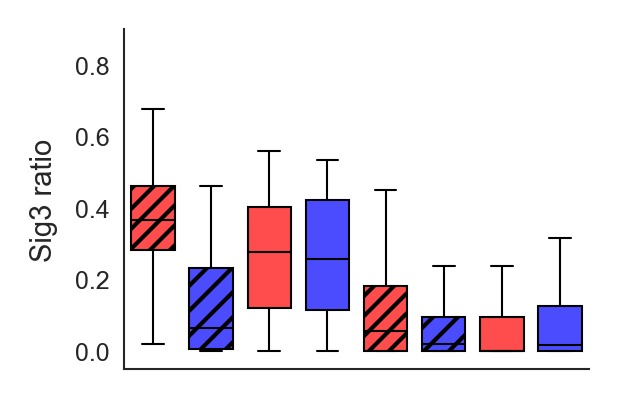

In [46]:
fig = plt.figure(figsize=(2,1.5))
ax = fig.add_subplot(1,1,1)
bp=ax.boxplot(data_comp, showfliers=False,patch_artist=True, 
              widths=0.75)
colors=[(1,0,0,0.7),(0,0,1,0.7)]*4
hatches=["/////","////","",""]*2
# box face color
for b, c,h in zip(bp['boxes'], colors, hatches):
    b.set(linewidth=0.5) 
    b.set(hatch=h) 
    b.set(facecolor=c)
    b.set(edgecolor="k")
# median line
for b, c in zip(bp['medians'], colors):
    b.set(color="k",linewidth=0.5)
for b, c in zip(bp['whiskers'], colors*2):
    b.set(linewidth=0.5)
# caps
for b, c in zip(bp['caps'], colors*2):
    b.set( linewidth=0.5)

ax.set_xlabel('')
ax.set_xticklabels([])
ax.set_ylim(-0.05,0.9)
ax.tick_params(labelsize=6)

ax.set_ylabel("Sig3 ratio",fontsize=SMALL_SIZE)
ax.spines['top'].set_visible(False)
ax.spines['right' ].set_visible(False)

plt.savefig(path_to_results+"Figure3A_1_2.png",bbox_inches="tight")

In [47]:
_,p1=stats.mannwhitneyu(PPP,PPN)
_,p2=stats.mannwhitneyu(PNP,PNN)
_,p3=stats.mannwhitneyu(NPP,NPN)
_,p4=stats.mannwhitneyu(NNP,NNN)
_,p12=stats.mannwhitneyu( np.concatenate([PPP,PPN]),   np.concatenate([PNP,PNN])  )
_,p34=stats.mannwhitneyu( np.concatenate([NPP,NPN]),   np.concatenate([NNP,NNN])  )
for p in [p1,p2,p3,p4,p12,p34]:
    print( "p = {:.2e}".format(p) )

p = 2.92e-09
p = 4.85e-01
p = 9.51e-24
p = 1.49e-10
p = 2.65e-03
p = 5.15e-14


In [48]:
value="HRD_score"
plt_df3=plt_df.dropna(subset=[value])
PPP=plt_df3.loc[ (plt_df3["HA_cases"]==1) & (plt_df3["Gender_sTP53m"]=="Female_TP53m"), value].values
PPN=plt_df3.loc[ (plt_df3["HA_cases"]==1) & (plt_df3["Gender_sTP53m"]=="Male_TP53m"), value].values
PNP=plt_df3.loc[ (plt_df3["HA_cases"]==1) & (plt_df3["Gender_sTP53m"]=="Female_TP53wt"), value].values
PNN=plt_df3.loc[ (plt_df3["HA_cases"]==1) & (plt_df3["Gender_sTP53m"]=="Male_TP53wt"), value].values
NPP=plt_df3.loc[ (plt_df3["HA_cases"]==0) & (plt_df3["Gender_sTP53m"]=="Female_TP53m"), value].values
NPN=plt_df3.loc[ (plt_df3["HA_cases"]==0) & (plt_df3["Gender_sTP53m"]=="Male_TP53m"), value].values
NNP=plt_df3.loc[ (plt_df3["HA_cases"]==0) & (plt_df3["Gender_sTP53m"]=="Female_TP53wt"), value].values
NNN=plt_df3.loc[ (plt_df3["HA_cases"]==0) & (plt_df3["Gender_sTP53m"]=="Male_TP53wt"), value].values
data_comp=[PPP,PPN,PNP,PNN,NPP,NPN,NNP,NNN]

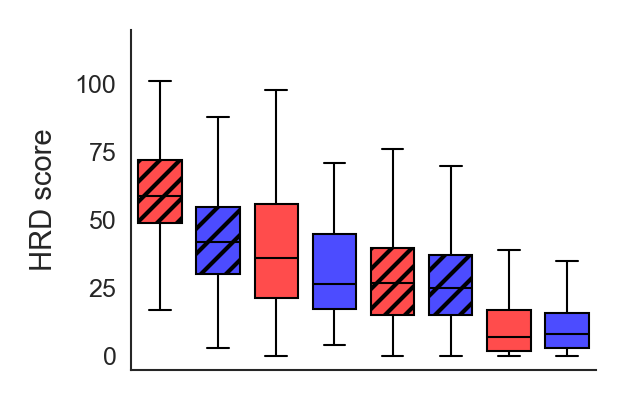

In [49]:
fig = plt.figure(figsize=(2,1.5))
ax = fig.add_subplot(1,1,1)
bp=ax.boxplot(data_comp, showfliers=False,patch_artist=True, 
              widths=0.75)
colors=[(1,0,0,0.7),(0,0,1,0.7)]*4
hatches=["/////","////","",""]*2
# box face color
for b, c,h in zip(bp['boxes'], colors, hatches):
    b.set(linewidth=0.5) 
    b.set(hatch=h) 
    b.set(facecolor=c)
    b.set(edgecolor="k")
# median line
for b, c in zip(bp['medians'], colors):
    b.set(color="k",linewidth=0.5)
for b, c in zip(bp['whiskers'], colors*2):
    b.set(linewidth=0.5)
# caps
for b, c in zip(bp['caps'], colors*2):
    b.set( linewidth=0.5)

ax.set_xlabel('')
ax.set_xticklabels([])
ax.set_ylim(-5,120)
ax.tick_params(labelsize=6)

ax.set_ylabel("HRD score",fontsize=SMALL_SIZE)
ax.spines['top'].set_visible(False)
ax.spines['right' ].set_visible(False)

plt.savefig(path_to_results+"Figure3A_2_1.png",bbox_inches="tight")

In [50]:
_,p1=stats.mannwhitneyu(PPP,PPN)
_,p2=stats.mannwhitneyu(PNP,PNN)
_,p3=stats.mannwhitneyu(NPP,NPN)
_,p4=stats.mannwhitneyu(NNP,NNN)
_,p12=stats.mannwhitneyu( np.concatenate([PPP,PPN]),   np.concatenate([PNP,PNN])  )
_,p34=stats.mannwhitneyu( np.concatenate([NPP,NPN]),   np.concatenate([NNP,NNN])  )
for p in [p1,p2,p3,p4,p12,p34]:
    print( "p = {:.2e}".format(p) )

p = 8.46e-08
p = 8.12e-03
p = 9.48e-03
p = 1.14e-02
p = 3.05e-22
p = 0.00e+00


In [51]:
value="MSK_Sig3_ratio"
plt_df3=plt_df.dropna(subset=[value])
PPP=plt_df3.loc[ (plt_df3["HA_cases"]==1) & (plt_df3["Gender_sTP53m"]=="Female_TP53m"), value].values
PPN=plt_df3.loc[ (plt_df3["HA_cases"]==1) & (plt_df3["Gender_sTP53m"]=="Male_TP53m"), value].values
PNP=plt_df3.loc[ (plt_df3["HA_cases"]==1) & (plt_df3["Gender_sTP53m"]=="Female_TP53wt"), value].values
PNN=plt_df3.loc[ (plt_df3["HA_cases"]==1) & (plt_df3["Gender_sTP53m"]=="Male_TP53wt"), value].values
NPP=plt_df3.loc[ (plt_df3["HA_cases"]==0) & (plt_df3["Gender_sTP53m"]=="Female_TP53m"), value].values
NPN=plt_df3.loc[ (plt_df3["HA_cases"]==0) & (plt_df3["Gender_sTP53m"]=="Male_TP53m"), value].values
NNP=plt_df3.loc[ (plt_df3["HA_cases"]==0) & (plt_df3["Gender_sTP53m"]=="Female_TP53wt"), value].values
NNN=plt_df3.loc[ (plt_df3["HA_cases"]==0) & (plt_df3["Gender_sTP53m"]=="Male_TP53wt"), value].values
data_comp=[PPP,PPN,PNP,PNN,NPP,NPN,NNP,NNN]

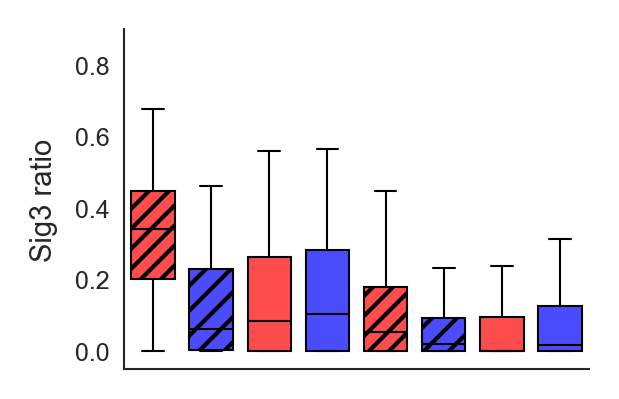

In [52]:
fig = plt.figure(figsize=(2,1.5))
ax = fig.add_subplot(1,1,1)
bp=ax.boxplot(data_comp, showfliers=False,patch_artist=True, 
              widths=0.75)
colors=[(1,0,0,0.7),(0,0,1,0.7)]*4
hatches=["/////","////","",""]*2
# box face color
for b, c,h in zip(bp['boxes'], colors, hatches):
    b.set(linewidth=0.5) 
    b.set(hatch=h) 
    b.set(facecolor=c)
    b.set(edgecolor="k")
# median line
for b, c in zip(bp['medians'], colors):
    b.set(color="k",linewidth=0.5)
for b, c in zip(bp['whiskers'], colors*2):
    b.set(linewidth=0.5)
# caps
for b, c in zip(bp['caps'], colors*2):
    b.set( linewidth=0.5)

ax.set_xlabel('')
ax.set_xticklabels([])
ax.set_ylim(-0.05,0.9)
ax.tick_params(labelsize=6)

ax.set_ylabel("Sig3 ratio",fontsize=SMALL_SIZE)
ax.spines['top'].set_visible(False)
ax.spines['right' ].set_visible(False)

plt.savefig(path_to_results+"Figure3A_2_2.png",bbox_inches="tight",)

In [53]:
_,p1=stats.mannwhitneyu(PPP,PPN)
_,p2=stats.mannwhitneyu(PNP,PNN)
_,p3=stats.mannwhitneyu(NPP,NPN)
_,p4=stats.mannwhitneyu(NNP,NNN)
_,p12=stats.mannwhitneyu( np.concatenate([PPP,PPN]),   np.concatenate([PNP,PNN])  )
_,p34=stats.mannwhitneyu( np.concatenate([NPP,NPN]),   np.concatenate([NNP,NNN])  )
for p in [p1,p2,p3,p4,p12,p34]:
    print( "p = {:.2e}".format(p) )

p = 1.54e-12
p = 2.63e-01
p = 5.04e-23
p = 3.22e-10
p = 1.41e-13
p = 7.46e-13


# Supplementary Figure 6

In [54]:
cancer_type_exception=["OV","BRC","PRAD","PAAD"]

In [55]:
Counter(plt_df.loc[plt_df["CancerType"].isin(cancer_type_exception),"CancerType"])

Counter({'BRC': 1009, 'PRAD': 493, 'PAAD': 176, 'OV': 409})

p = 1.74e-02
p = 1.28e-01
p = 3.77e-07
p = 2.49e-11
p = 5.57e-07
p = 0.00e+00


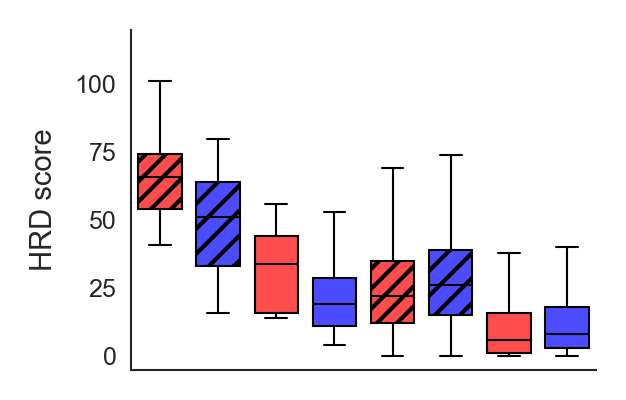

In [56]:
value="HRD_score"
plt_df3=plt_df.dropna(subset=[value])
plt_df3=plt_df3[~plt_df3["CancerType"].isin(cancer_type_exception)]
PPP=plt_df3.loc[ (plt_df3["BRCA12_alteration"]==1) & (plt_df3["Gender_sTP53m"]=="Female_TP53m"), value].values
PPN=plt_df3.loc[ (plt_df3["BRCA12_alteration"]==1) & (plt_df3["Gender_sTP53m"]=="Male_TP53m"), value].values
PNP=plt_df3.loc[ (plt_df3["BRCA12_alteration"]==1) & (plt_df3["Gender_sTP53m"]=="Female_TP53wt"), value].values
PNN=plt_df3.loc[ (plt_df3["BRCA12_alteration"]==1) & (plt_df3["Gender_sTP53m"]=="Male_TP53wt"), value].values
NPP=plt_df3.loc[ (plt_df3["BRCA12_alteration"]==0) & (plt_df3["Gender_sTP53m"]=="Female_TP53m"), value].values
NPN=plt_df3.loc[ (plt_df3["BRCA12_alteration"]==0) & (plt_df3["Gender_sTP53m"]=="Male_TP53m"), value].values
NNP=plt_df3.loc[ (plt_df3["BRCA12_alteration"]==0) & (plt_df3["Gender_sTP53m"]=="Female_TP53wt"), value].values
NNN=plt_df3.loc[ (plt_df3["BRCA12_alteration"]==0) & (plt_df3["Gender_sTP53m"]=="Male_TP53wt"), value].values
data_comp=[PPP,PPN,PNP,PNN,NPP,NPN,NNP,NNN]

fig = plt.figure(figsize=(2,1.5))
ax = fig.add_subplot(1,1,1)
bp=ax.boxplot(data_comp, showfliers=False,patch_artist=True, 
              widths=0.75)
colors=[(1,0,0,0.7),(0,0,1,0.7)]*4
hatches=["/////","////","",""]*2
# box face color
for b, c,h in zip(bp['boxes'], colors, hatches):
    b.set(linewidth=0.5) 
    b.set(hatch=h) 
    b.set(facecolor=c)
    b.set(edgecolor="k")
# median line
for b, c in zip(bp['medians'], colors):
    b.set(color="k",linewidth=0.5)
for b, c in zip(bp['whiskers'], colors*2):
    b.set(linewidth=0.5)
# caps
for b, c in zip(bp['caps'], colors*2):
    b.set( linewidth=0.5)

ax.set_xlabel('')
ax.set_xticklabels([])
ax.set_ylim(-5,120)
ax.tick_params(labelsize=6)

ax.set_ylabel("HRD score",fontsize=SMALL_SIZE)
ax.spines['top'].set_visible(False)
ax.spines['right' ].set_visible(False)
ax.set_title("",fontsize=6)
plt.savefig(path_to_results+"Supplement_Figure6_1.png",bbox_inches="tight")

_,p1=stats.mannwhitneyu(PPP,PPN)
_,p2=stats.mannwhitneyu(PNP,PNN)
_,p3=stats.mannwhitneyu(NPP,NPN)
_,p4=stats.mannwhitneyu(NNP,NNN)
_,p12=stats.mannwhitneyu( np.concatenate([PPP,PPN]),   np.concatenate([PNP,PNN])  )
_,p34=stats.mannwhitneyu( np.concatenate([NPP,NPN]),   np.concatenate([NNP,NNN])  )
for p in [p1,p2,p3,p4,p12,p34]:
    print( "p = {:.2e}".format(p) )

p = 3.87e-01
p = 3.77e-01
p = 6.26e-07
p = 1.00e-10
p = 8.44e-06
p = 0.00e+00


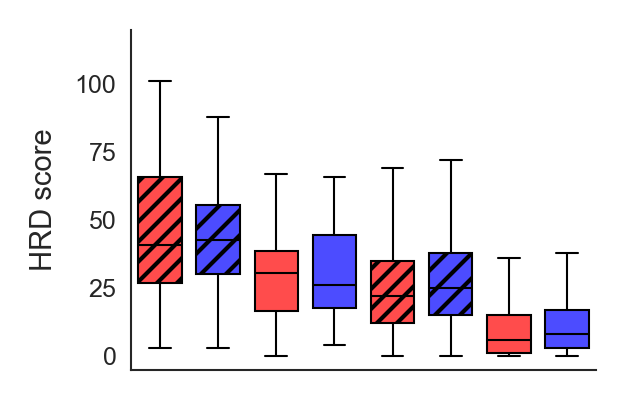

In [57]:
value="HRD_score"
plt_df3=plt_df.dropna(subset=[value])
plt_df3=plt_df3[~plt_df3["CancerType"].isin(cancer_type_exception)]
PPP=plt_df3.loc[ (plt_df3["HA_cases"]==1) & (plt_df3["Gender_sTP53m"]=="Female_TP53m"), value].values
PPN=plt_df3.loc[ (plt_df3["HA_cases"]==1) & (plt_df3["Gender_sTP53m"]=="Male_TP53m"), value].values
PNP=plt_df3.loc[ (plt_df3["HA_cases"]==1) & (plt_df3["Gender_sTP53m"]=="Female_TP53wt"), value].values
PNN=plt_df3.loc[ (plt_df3["HA_cases"]==1) & (plt_df3["Gender_sTP53m"]=="Male_TP53wt"), value].values
NPP=plt_df3.loc[ (plt_df3["HA_cases"]==0) & (plt_df3["Gender_sTP53m"]=="Female_TP53m"), value].values
NPN=plt_df3.loc[ (plt_df3["HA_cases"]==0) & (plt_df3["Gender_sTP53m"]=="Male_TP53m"), value].values
NNP=plt_df3.loc[ (plt_df3["HA_cases"]==0) & (plt_df3["Gender_sTP53m"]=="Female_TP53wt"), value].values
NNN=plt_df3.loc[ (plt_df3["HA_cases"]==0) & (plt_df3["Gender_sTP53m"]=="Male_TP53wt"), value].values
data_comp=[PPP,PPN,PNP,PNN,NPP,NPN,NNP,NNN]

fig = plt.figure(figsize=(2,1.5))
ax = fig.add_subplot(1,1,1)
bp=ax.boxplot(data_comp, showfliers=False,patch_artist=True, 
              widths=0.75)
colors=[(1,0,0,0.7),(0,0,1,0.7)]*4
hatches=["/////","////","",""]*2
# box face color
for b, c,h in zip(bp['boxes'], colors, hatches):
    b.set(linewidth=0.5) 
    b.set(hatch=h) 
    b.set(facecolor=c)
    b.set(edgecolor="k")
# median line
for b, c in zip(bp['medians'], colors):
    b.set(color="k",linewidth=0.5)
for b, c in zip(bp['whiskers'], colors*2):
    b.set(linewidth=0.5)
# caps
for b, c in zip(bp['caps'], colors*2):
    b.set( linewidth=0.5)

ax.set_xlabel('')
ax.set_xticklabels([])
ax.set_ylim(-5,120)
ax.tick_params(labelsize=6)

ax.set_ylabel("HRD score",fontsize=SMALL_SIZE)
ax.spines['top'].set_visible(False)
ax.spines['right' ].set_visible(False)
ax.set_title("",fontsize=6)
plt.savefig(path_to_results+"Supplement_Figure6_3.png",bbox_inches="tight")

_,p1=stats.mannwhitneyu(PPP,PPN)
_,p2=stats.mannwhitneyu(PNP,PNN)
_,p3=stats.mannwhitneyu(NPP,NPN)
_,p4=stats.mannwhitneyu(NNP,NNN)
_,p12=stats.mannwhitneyu( np.concatenate([PPP,PPN]),   np.concatenate([PNP,PNN])  )
_,p34=stats.mannwhitneyu( np.concatenate([NPP,NPN]),   np.concatenate([NNP,NNN])  )
for p in [p1,p2,p3,p4,p12,p34]:
    print( "p = {:.2e}".format(p) )

p = 8.13e-04
p = 3.20e-01
p = 4.59e-02
p = 1.27e-09
p = 4.44e-01
p = 1.07e-02


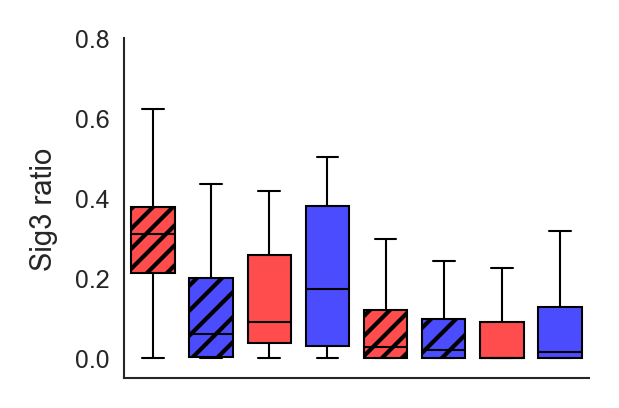

In [58]:
value="MSK_Sig3_ratio"
plt_df3=plt_df.dropna(subset=[value])
plt_df3=plt_df3[~plt_df3["CancerType"].isin(cancer_type_exception)]
PPP=plt_df3.loc[ (plt_df3["BRCA12_alteration"]==1) & (plt_df3["Gender_sTP53m"]=="Female_TP53m"), value].values
PPN=plt_df3.loc[ (plt_df3["BRCA12_alteration"]==1) & (plt_df3["Gender_sTP53m"]=="Male_TP53m"), value].values
PNP=plt_df3.loc[ (plt_df3["BRCA12_alteration"]==1) & (plt_df3["Gender_sTP53m"]=="Female_TP53wt"), value].values
PNN=plt_df3.loc[ (plt_df3["BRCA12_alteration"]==1) & (plt_df3["Gender_sTP53m"]=="Male_TP53wt"), value].values
NPP=plt_df3.loc[ (plt_df3["BRCA12_alteration"]==0) & (plt_df3["Gender_sTP53m"]=="Female_TP53m"), value].values
NPN=plt_df3.loc[ (plt_df3["BRCA12_alteration"]==0) & (plt_df3["Gender_sTP53m"]=="Male_TP53m"), value].values
NNP=plt_df3.loc[ (plt_df3["BRCA12_alteration"]==0) & (plt_df3["Gender_sTP53m"]=="Female_TP53wt"), value].values
NNN=plt_df3.loc[ (plt_df3["BRCA12_alteration"]==0) & (plt_df3["Gender_sTP53m"]=="Male_TP53wt"), value].values
data_comp=[PPP,PPN,PNP,PNN,NPP,NPN,NNP,NNN]

fig = plt.figure(figsize=(2,1.5))
ax = fig.add_subplot(1,1,1)
bp=ax.boxplot(data_comp, showfliers=False,patch_artist=True, 
              widths=0.75)
colors=[(1,0,0,0.7),(0,0,1,0.7)]*4
hatches=["/////","////","",""]*2
# box face color
for b, c,h in zip(bp['boxes'], colors, hatches):
    b.set(linewidth=0.5) 
    b.set(hatch=h) 
    b.set(facecolor=c)
    b.set(edgecolor="k")
# median line
for b, c in zip(bp['medians'], colors):
    b.set(color="k",linewidth=0.5)
for b, c in zip(bp['whiskers'], colors*2):
    b.set(linewidth=0.5)
# caps
for b, c in zip(bp['caps'], colors*2):
    b.set( linewidth=0.5)

ax.set_xlabel('')
ax.set_xticklabels([])
ax.set_ylim(-0.05,0.8)
ax.tick_params(labelsize=6)

ax.set_ylabel("Sig3 ratio",fontsize=SMALL_SIZE)
ax.spines['top'].set_visible(False)
ax.spines['right' ].set_visible(False)
ax.set_title("",fontsize=6)
plt.savefig(path_to_results+"Supplement_Figure6_2.png",bbox_inches="tight")

_,p1=stats.mannwhitneyu(PPP,PPN)
_,p2=stats.mannwhitneyu(PNP,PNN)
_,p3=stats.mannwhitneyu(NPP,NPN)
_,p4=stats.mannwhitneyu(NNP,NNN)
_,p12=stats.mannwhitneyu( np.concatenate([PPP,PPN]),   np.concatenate([PNP,PNN])  )
_,p34=stats.mannwhitneyu( np.concatenate([NPP,NPN]),   np.concatenate([NNP,NNN])  )
for p in [p1,p2,p3,p4,p12,p34]:
    print( "p = {:.2e}".format(p) )

p = 1.27e-01
p = 3.10e-02
p = 2.91e-02
p = 4.08e-09
p = 4.80e-02
p = 1.54e-02


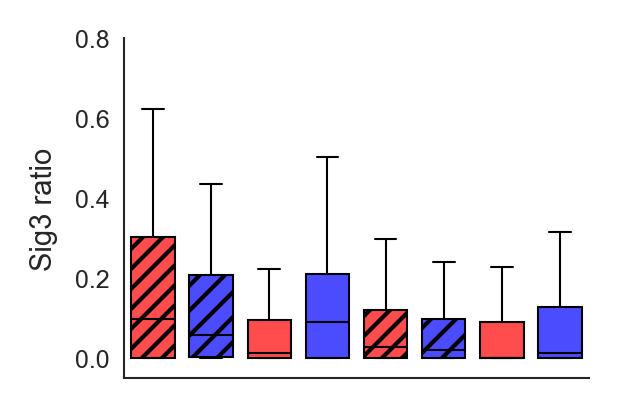

In [59]:
value="MSK_Sig3_ratio"
plt_df3=plt_df.dropna(subset=[value])
plt_df3=plt_df3[~plt_df3["CancerType"].isin(cancer_type_exception)]
PPP=plt_df3.loc[ (plt_df3["HA_cases"]==1) & (plt_df3["Gender_sTP53m"]=="Female_TP53m"), value].values
PPN=plt_df3.loc[ (plt_df3["HA_cases"]==1) & (plt_df3["Gender_sTP53m"]=="Male_TP53m"), value].values
PNP=plt_df3.loc[ (plt_df3["HA_cases"]==1) & (plt_df3["Gender_sTP53m"]=="Female_TP53wt"), value].values
PNN=plt_df3.loc[ (plt_df3["HA_cases"]==1) & (plt_df3["Gender_sTP53m"]=="Male_TP53wt"), value].values
NPP=plt_df3.loc[ (plt_df3["HA_cases"]==0) & (plt_df3["Gender_sTP53m"]=="Female_TP53m"), value].values
NPN=plt_df3.loc[ (plt_df3["HA_cases"]==0) & (plt_df3["Gender_sTP53m"]=="Male_TP53m"), value].values
NNP=plt_df3.loc[ (plt_df3["HA_cases"]==0) & (plt_df3["Gender_sTP53m"]=="Female_TP53wt"), value].values
NNN=plt_df3.loc[ (plt_df3["HA_cases"]==0) & (plt_df3["Gender_sTP53m"]=="Male_TP53wt"), value].values
data_comp=[PPP,PPN,PNP,PNN,NPP,NPN,NNP,NNN]

fig = plt.figure(figsize=(2,1.5))
ax = fig.add_subplot(1,1,1)
bp=ax.boxplot(data_comp, showfliers=False,patch_artist=True, 
              widths=0.75)
colors=[(1,0,0,0.7),(0,0,1,0.7)]*4
hatches=["/////","////","",""]*2
# box face color
for b, c,h in zip(bp['boxes'], colors, hatches):
    b.set(linewidth=0.5) 
    b.set(hatch=h) 
    b.set(facecolor=c)
    b.set(edgecolor="k")
# median line
for b, c in zip(bp['medians'], colors):
    b.set(color="k",linewidth=0.5)
for b, c in zip(bp['whiskers'], colors*2):
    b.set(linewidth=0.5)
# caps
for b, c in zip(bp['caps'], colors*2):
    b.set( linewidth=0.5)

ax.set_xlabel('')
ax.set_xticklabels([])
ax.set_ylim(-0.05,0.8)
ax.tick_params(labelsize=6)

ax.set_ylabel("Sig3 ratio",fontsize=SMALL_SIZE)
ax.spines['top'].set_visible(False)
ax.spines['right' ].set_visible(False)
ax.set_title("",fontsize=6)
plt.savefig(path_to_results+"Supplement_Figure6_4.png",bbox_inches="tight")

_,p1=stats.mannwhitneyu(PPP,PPN)
_,p2=stats.mannwhitneyu(PNP,PNN)
_,p3=stats.mannwhitneyu(NPP,NPN)
_,p4=stats.mannwhitneyu(NNP,NNN)
_,p12=stats.mannwhitneyu( np.concatenate([PPP,PPN]),   np.concatenate([PNP,PNN])  )
_,p34=stats.mannwhitneyu( np.concatenate([NPP,NPN]),   np.concatenate([NNP,NNN])  )
for p in [p1,p2,p3,p4,p12,p34]:
    print( "p = {:.2e}".format(p) )

# Supplmentary Figure 7

In [60]:
value="HRD_score"
int_df=pd.DataFrame()
in_df=plt_df.copy()
for cancer in in_df["CancerType"].unique():
    plt_df3=in_df[ in_df["CancerType"]==cancer]
    PPP=np.nanmean(plt_df3.loc[ (plt_df3["HA_cases"]==1) & (plt_df3["Gender_sTP53m"]=="Female_TP53m"), value])
    PPN=np.nanmean(plt_df3.loc[ (plt_df3["HA_cases"]==1) & (plt_df3["Gender_sTP53m"]=="Male_TP53m"), value])
    PNP=np.nanmean(plt_df3.loc[ (plt_df3["HA_cases"]==1) & (plt_df3["Gender_sTP53m"]=="Female_TP53wt"), value])
    PNN=np.nanmean(plt_df3.loc[ (plt_df3["HA_cases"]==1) & (plt_df3["Gender_sTP53m"]=="Male_TP53wt"), value])
    NPP=np.nanmean(plt_df3.loc[ (plt_df3["HA_cases"]==0) & (plt_df3["Gender_sTP53m"]=="Female_TP53m"), value])
    NPN=np.nanmean(plt_df3.loc[ (plt_df3["HA_cases"]==0) & (plt_df3["Gender_sTP53m"]=="Male_TP53m"), value])
    NNP=np.nanmean(plt_df3.loc[ (plt_df3["HA_cases"]==0) & (plt_df3["Gender_sTP53m"]=="Female_TP53wt"), value])
    NNN=np.nanmean(plt_df3.loc[ (plt_df3["HA_cases"]==0) & (plt_df3["Gender_sTP53m"]=="Male_TP53wt"), value])
    add=pd.DataFrame([PPP,PPN,PNP,PNN,NPP,NPN,NNP,NNN],columns=[cancer])
    int_df=pd.concat([int_df,add],axis=1)

<ipython-input-60-9a0955cedd45>:7: RuntimeWarning: Mean of empty slice
  PPN=np.nanmean(plt_df3.loc[ (plt_df3["HA_cases"]==1) & (plt_df3["Gender_sTP53m"]=="Male_TP53m"), value])
<ipython-input-60-9a0955cedd45>:11: RuntimeWarning: Mean of empty slice
  NPN=np.nanmean(plt_df3.loc[ (plt_df3["HA_cases"]==0) & (plt_df3["Gender_sTP53m"]=="Male_TP53m"), value])
<ipython-input-60-9a0955cedd45>:7: RuntimeWarning: Mean of empty slice
  PPN=np.nanmean(plt_df3.loc[ (plt_df3["HA_cases"]==1) & (plt_df3["Gender_sTP53m"]=="Male_TP53m"), value])
<ipython-input-60-9a0955cedd45>:8: RuntimeWarning: Mean of empty slice
  PNP=np.nanmean(plt_df3.loc[ (plt_df3["HA_cases"]==1) & (plt_df3["Gender_sTP53m"]=="Female_TP53wt"), value])
<ipython-input-60-9a0955cedd45>:9: RuntimeWarning: Mean of empty slice
  PNN=np.nanmean(plt_df3.loc[ (plt_df3["HA_cases"]==1) & (plt_df3["Gender_sTP53m"]=="Male_TP53wt"), value])
<ipython-input-60-9a0955cedd45>:8: RuntimeWarning: Mean of empty slice
  PNP=np.nanmean(plt_df3.loc[ (plt

In [61]:
value2="MSK_Sig3_ratio"
int_df2=pd.DataFrame()
in_df=plt_df.copy()
for cancer in in_df["CancerType"].unique():
    plt_df3=in_df[ in_df["CancerType"]==cancer]
    PPP=np.nanmean(plt_df3.loc[ (plt_df3["HA_cases"]==1) & (plt_df3["Gender_sTP53m"]=="Female_TP53m"), value2])
    PPN=np.nanmean(plt_df3.loc[ (plt_df3["HA_cases"]==1) & (plt_df3["Gender_sTP53m"]=="Male_TP53m"), value2])
    PNP=np.nanmean(plt_df3.loc[ (plt_df3["HA_cases"]==1) & (plt_df3["Gender_sTP53m"]=="Female_TP53wt"), value2])
    PNN=np.nanmean(plt_df3.loc[ (plt_df3["HA_cases"]==1) & (plt_df3["Gender_sTP53m"]=="Male_TP53wt"), value2])
    NPP=np.nanmean(plt_df3.loc[ (plt_df3["HA_cases"]==0) & (plt_df3["Gender_sTP53m"]=="Female_TP53m"), value2])
    NPN=np.nanmean(plt_df3.loc[ (plt_df3["HA_cases"]==0) & (plt_df3["Gender_sTP53m"]=="Male_TP53m"), value2])
    NNP=np.nanmean(plt_df3.loc[ (plt_df3["HA_cases"]==0) & (plt_df3["Gender_sTP53m"]=="Female_TP53wt"), value2])
    NNN=np.nanmean(plt_df3.loc[ (plt_df3["HA_cases"]==0) & (plt_df3["Gender_sTP53m"]=="Male_TP53wt"), value2])
    add=pd.DataFrame([PPP,PPN,PNP,PNN,NPP,NPN,NNP,NNN],columns=[cancer])
    int_df2=pd.concat([int_df2,add],axis=1)

<ipython-input-61-d292f138d033>:7: RuntimeWarning: Mean of empty slice
  PPN=np.nanmean(plt_df3.loc[ (plt_df3["HA_cases"]==1) & (plt_df3["Gender_sTP53m"]=="Male_TP53m"), value2])
<ipython-input-61-d292f138d033>:11: RuntimeWarning: Mean of empty slice
  NPN=np.nanmean(plt_df3.loc[ (plt_df3["HA_cases"]==0) & (plt_df3["Gender_sTP53m"]=="Male_TP53m"), value2])
<ipython-input-61-d292f138d033>:7: RuntimeWarning: Mean of empty slice
  PPN=np.nanmean(plt_df3.loc[ (plt_df3["HA_cases"]==1) & (plt_df3["Gender_sTP53m"]=="Male_TP53m"), value2])
<ipython-input-61-d292f138d033>:8: RuntimeWarning: Mean of empty slice
  PNP=np.nanmean(plt_df3.loc[ (plt_df3["HA_cases"]==1) & (plt_df3["Gender_sTP53m"]=="Female_TP53wt"), value2])
<ipython-input-61-d292f138d033>:9: RuntimeWarning: Mean of empty slice
  PNN=np.nanmean(plt_df3.loc[ (plt_df3["HA_cases"]==1) & (plt_df3["Gender_sTP53m"]=="Male_TP53wt"), value2])
<ipython-input-61-d292f138d033>:8: RuntimeWarning: Mean of empty slice
  PNP=np.nanmean(plt_df3.loc[

In [62]:
int_df3=pd.DataFrame()
in_df=plt_df.copy()
for cancer in in_df["CancerType"].unique():
    plt_df3=in_df[ in_df["CancerType"]==cancer]
    PPP=np.sum( (plt_df3["HA_cases"]==1) & (plt_df3["Gender_sTP53m"]=="Female_TP53m"))
    PPN=np.sum( (plt_df3["HA_cases"]==1) & (plt_df3["Gender_sTP53m"]=="Male_TP53m"))
    PNP=np.sum( (plt_df3["HA_cases"]==1) & (plt_df3["Gender_sTP53m"]=="Female_TP53wt"))
    PNN=np.sum( (plt_df3["HA_cases"]==1) & (plt_df3["Gender_sTP53m"]=="Male_TP53wt"))
    NPP=np.sum( (plt_df3["HA_cases"]==0) & (plt_df3["Gender_sTP53m"]=="Female_TP53m"))
    NPN=np.sum( (plt_df3["HA_cases"]==0) & (plt_df3["Gender_sTP53m"]=="Male_TP53m"))
    NNP=np.sum( (plt_df3["HA_cases"]==0) & (plt_df3["Gender_sTP53m"]=="Female_TP53wt"))
    NNN=np.sum( (plt_df3["HA_cases"]==0) & (plt_df3["Gender_sTP53m"]=="Male_TP53wt"))
    add=pd.DataFrame([PPP,PPN,PNP,PNN,NPP,NPN,NNP,NNN],columns=[cancer])
    int_df3=pd.concat([int_df3,add],axis=1)

In [63]:
int_df3

,BRC,LGG,HNSC,UCEC,STES,THCA,SKCM,CRC,KRC,LUSC,...,LUAD,OV,ACC,UCS,LIHC,CESC,UVM,MESO,TGCT,CHOL
0,62,1,1,13,3,0,1,1,0,5,...,2,114,1,0,0,2,0,0,0,0
1,0,0,4,0,9,0,4,6,0,15,...,0,0,0,0,2,0,0,0,0,0
2,50,0,0,3,6,2,4,4,0,0,...,8,8,0,0,1,8,0,0,0,0
3,4,0,4,0,15,0,7,1,2,1,...,4,0,2,0,2,0,0,1,16,0
4,284,103,98,179,86,2,21,145,14,95,...,137,259,8,52,26,20,0,4,0,2
5,0,144,254,0,270,0,41,158,24,289,...,126,0,9,0,82,0,0,10,1,2
6,602,122,38,320,87,353,140,103,219,25,...,126,28,50,5,91,251,35,11,0,18
7,7,139,103,0,142,127,220,107,436,39,...,107,0,21,0,154,0,45,56,111,14


In [64]:
int_df3_ratio=int_df3/ np.sum(int_df3,axis=0)*100
int_df3_ratio

,BRC,LGG,HNSC,UCEC,STES,THCA,SKCM,CRC,KRC,LUSC,...,LUAD,OV,ACC,UCS,LIHC,CESC,UVM,MESO,TGCT,CHOL
0,6.144698,0.196464,0.199203,2.524272,0.485437,0.000000,0.228311,0.190476,0.000000,1.066098,...,0.392157,27.872861,1.098901,0.00000,0.000000,0.711744,0.00,0.000000,0.00000,0.000000
1,0.000000,0.000000,0.796813,0.000000,1.456311,0.000000,0.913242,1.142857,0.000000,3.198294,...,0.000000,0.000000,0.000000,0.00000,0.558659,0.000000,0.00,0.000000,0.00000,0.000000
2,4.955401,0.000000,0.000000,0.582524,0.970874,0.413223,0.913242,0.761905,0.000000,0.000000,...,1.568627,1.955990,0.000000,0.00000,0.279330,2.846975,0.00,0.000000,0.00000,0.000000
3,0.396432,0.000000,0.796813,0.000000,2.427184,0.000000,1.598174,0.190476,0.287770,0.213220,...,0.784314,0.000000,2.197802,0.00000,0.558659,0.000000,0.00,1.219512,12.50000,0.000000
4,28.146680,20.235756,19.521912,34.757282,13.915858,0.413223,4.794521,27.619048,2.014388,20.255864,...,26.862745,63.325183,8.791209,91.22807,7.262570,7.117438,0.00,4.878049,0.00000,5.555556
5,0.000000,28.290766,50.597610,0.000000,43.689320,0.000000,9.360731,30.095238,3.453237,61.620469,...,24.705882,0.000000,9.890110,0.00000,22.905028,0.000000,0.00,12.195122,0.78125,5.555556
6,59.663033,23.968566,7.569721,62.135922,14.077670,72.933884,31.963470,19.619048,31.510791,5.330490,...,24.705882,6.845966,54.945055,8.77193,25.418994,89.323843,43.75,13.414634,0.00000,50.000000
7,0.693756,27.308448,20.517928,0.000000,22.977346,26.239669,50.228311,20.380952,62.733813,8.315565,...,20.980392,0.000000,23.076923,0.00000,43.016760,0.000000,56.25,68.292683,86.71875,38.888889


In [65]:
plt_df1=int_df.T
plt_df1=plt_df1.sort_values([0,1,2,3,4,5,6,7],ascending=False)
plt_df1

,0,1,2,3,4,5,6,7
SKCM,66.000000,31.500000,6.750000,23.857143,18.761905,18.550000,18.664286,17.382488
BRC,64.596774,NaN,41.729167,56.750000,35.344322,NaN,15.366149,18.571429
OV,59.666667,NaN,72.250000,NaN,42.860558,NaN,26.640000,NaN
BLCA,58.500000,44.300000,37.000000,39.181818,30.040000,34.313433,21.638298,19.801418
SARC,54.750000,20.000000,39.000000,51.000000,32.361702,34.243243,29.666667,26.328125
LUSC,54.250000,44.533333,NaN,56.000000,34.263158,36.145329,24.720000,28.974359
UCEC,50.153846,NaN,35.000000,NaN,25.943820,NaN,3.325806,NaN
HNSC,50.000000,48.750000,NaN,36.500000,24.593750,28.606426,9.783784,17.020000
CESC,43.000000,NaN,31.714286,NaN,22.350000,NaN,19.534137,NaN
STES,29.666667,55.777778,33.333333,43.800000,30.670732,33.804000,13.809524,17.309353


In [66]:
cancer_order=list(plt_df1.index)
brca_cancers=["OV","BRC","PAAD","PRAD"]

In [67]:
plt_df2=int_df2.T.loc[cancer_order,:]
plt_df3=int_df3_ratio.T.loc[cancer_order,:]
plt_df3

,0,1,2,3,4,5,6,7
SKCM,0.228311,0.913242,0.913242,1.598174,4.794521,9.360731,31.963470,50.228311
BRC,6.144698,0.000000,4.955401,0.396432,28.146680,0.000000,59.663033,0.693756
OV,27.872861,0.000000,1.955990,0.000000,63.325183,0.000000,6.845966,0.000000
BLCA,0.975610,2.439024,0.975610,2.682927,12.195122,33.414634,11.951220,35.365854
SARC,1.709402,0.427350,1.709402,0.427350,20.940171,16.239316,29.914530,28.632479
LUSC,1.066098,3.198294,0.000000,0.213220,20.255864,61.620469,5.330490,8.315565
UCEC,2.524272,0.000000,0.582524,0.000000,34.757282,0.000000,62.135922,0.000000
HNSC,0.199203,0.796813,0.000000,0.796813,19.521912,50.597610,7.569721,20.517928
CESC,0.711744,0.000000,2.846975,0.000000,7.117438,0.000000,89.323843,0.000000
STES,0.485437,1.456311,0.970874,2.427184,13.915858,43.689320,14.077670,22.977346


In [68]:
from matplotlib.colors import LinearSegmentedColormap
gkp=LinearSegmentedColormap.from_list("green_grey_purple",["green","lightgrey","purple"])

In [69]:
m=np.nanmean(plt_df[value])
print(m)
vmin=0
vmax=60
center=m
cmap="coolwarm"

19.05692094903713


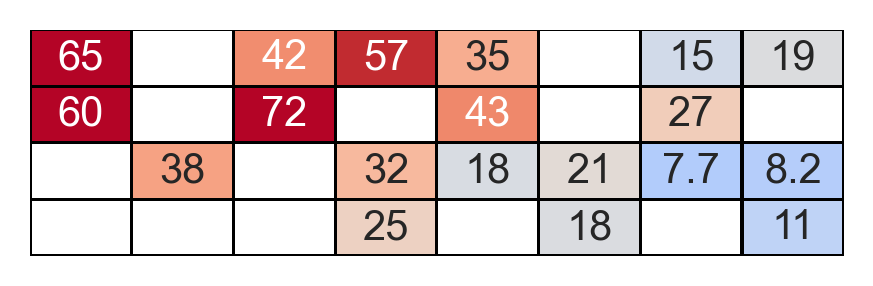

In [70]:
sns_df1=plt_df1.loc[plt_df1.index.isin(brca_cancers),:]
sns_df2=plt_df3.loc[plt_df3.index.isin(brca_cancers),:]
N=len(sns_df1)
fig=plt.figure(figsize=(3.5,0.25*N))
ax=fig.add_subplot(111)
ax=sns.heatmap(sns_df1,annot=sns_df1,cmap=cmap,cbar=False,xticklabels=0,vmin=vmin, vmax=vmax, center=center,
               linewidths=0.5,linecolor="k",yticklabels=0, annot_kws={"size":10})
ax.set_ylabel("")
plt.savefig(path_to_results+"Supplementary_Figure7_1.png",dpi=300,bbox_inches="tight")

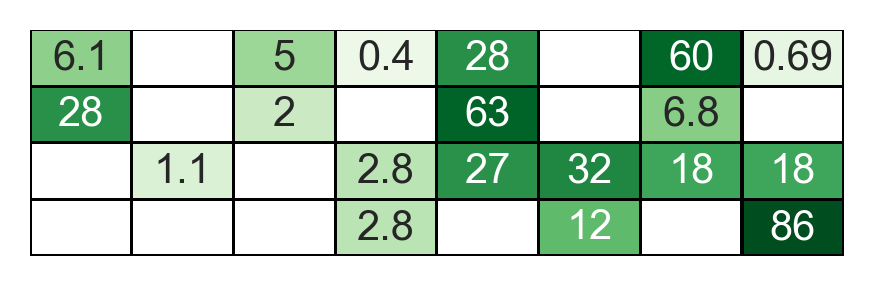

In [71]:
sns_df1=np.log10(plt_df3.loc[plt_df3.index.isin(brca_cancers),:]+1)
sns_df1=sns_df1[sns_df1!=0]
sns_df2=plt_df3.loc[plt_df3.index.isin(brca_cancers),:]

N=len(sns_df1)
fig=plt.figure(figsize=(3.5,0.25*N))
ax=fig.add_subplot(111)
ax=sns.heatmap(sns_df1,annot=sns_df2,cmap="Greens",cbar=False,xticklabels=0,vmin=0, vmax=2, #center=50,
               linewidths=0.5,linecolor="k",yticklabels=0, annot_kws={"size":10})
ax.set_ylabel("")
plt.savefig(path_to_results+"Supplementary_Figure7_3.png",dpi=300,bbox_inches="tight")

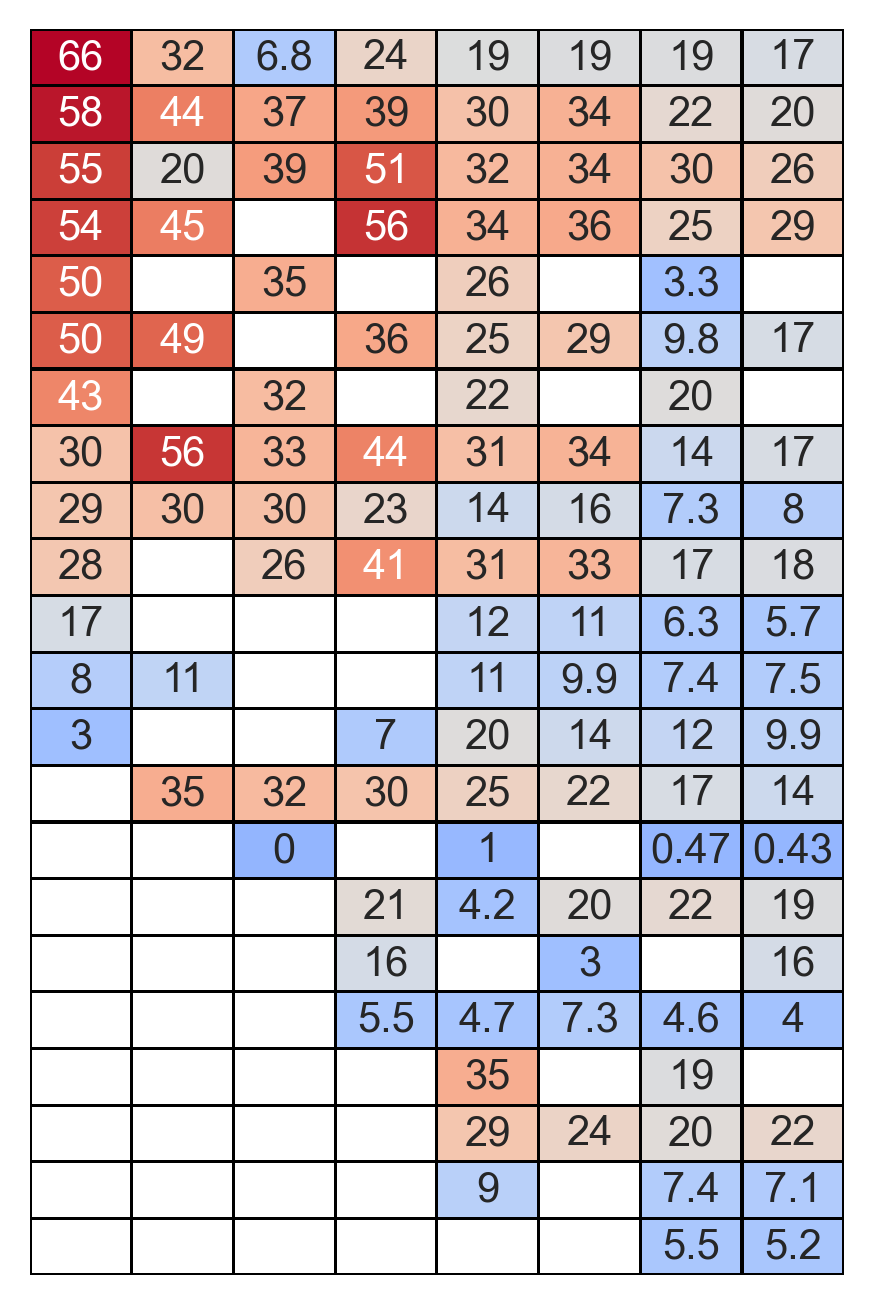

In [72]:
sns_df1=plt_df1.loc[~plt_df1.index.isin(brca_cancers),:]
sns_df2=plt_df3.loc[~plt_df1.index.isin(brca_cancers),:]
N=len(sns_df1)
fig=plt.figure(figsize=(3.5,0.25*N))
ax=fig.add_subplot(111)
ax=sns.heatmap(sns_df1,annot=sns_df1,cmap=cmap,cbar=False,xticklabels=0,vmin=vmin, vmax=vmax, center=center,
               linewidths=0.5,linecolor="k",yticklabels=0, annot_kws={"size":10})
ax.set_ylabel("")
plt.savefig(path_to_results+"Supplementary_Figure7_2.png",dpi=300,bbox_inches="tight")

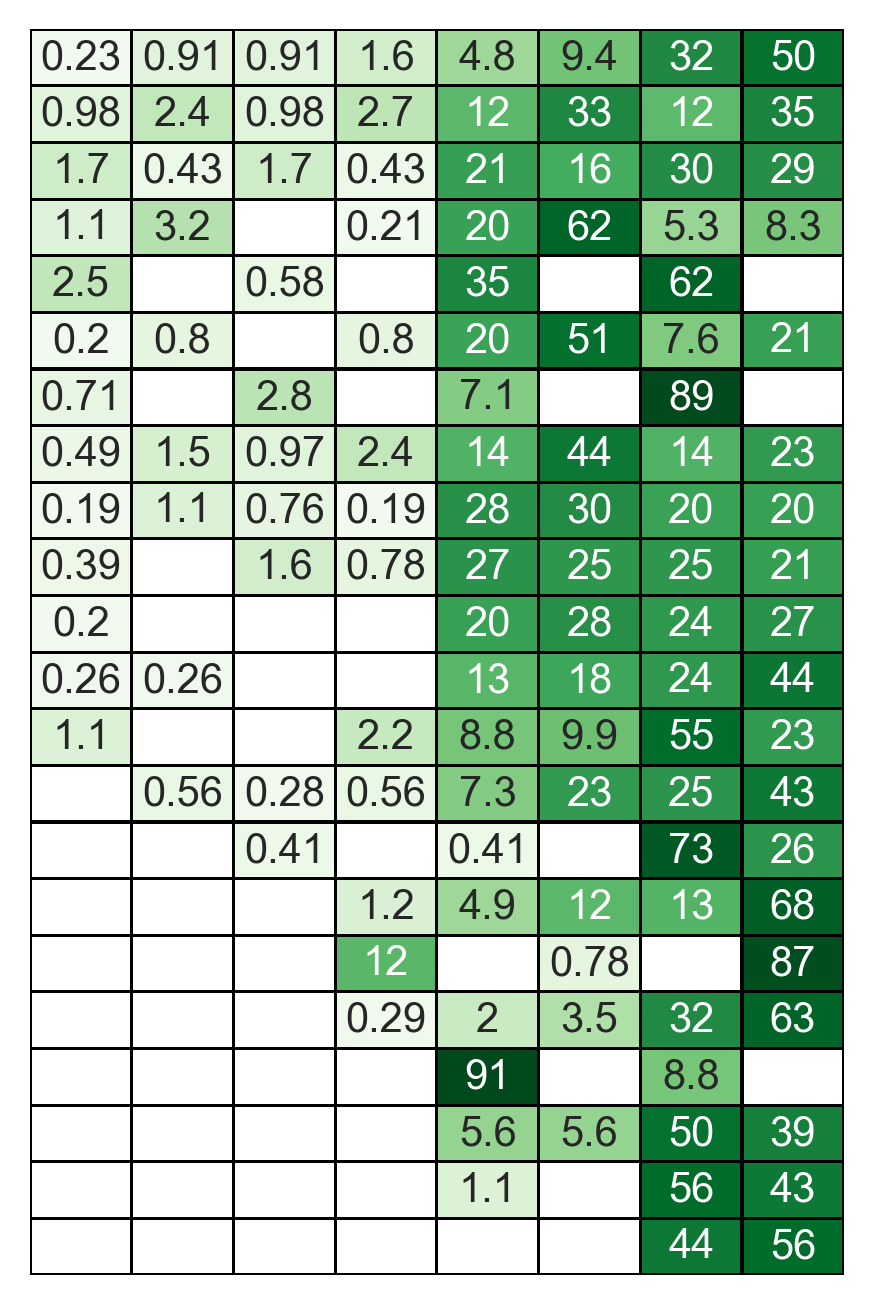

In [73]:
sns_df1=np.log10(plt_df3.loc[~plt_df1.index.isin(brca_cancers),:]+1)
sns_df1=sns_df1[sns_df1!=0]
sns_df2=plt_df3.loc[~plt_df3.index.isin(brca_cancers),:]

N=len(sns_df1)
fig=plt.figure(figsize=(3.5,0.25*N))
ax=fig.add_subplot(111)
ax=sns.heatmap(sns_df1,annot=sns_df2,cmap="Greens",cbar=False,xticklabels=0,vmin=0, vmax=2, #center=50,
               linewidths=0.5,linecolor="k",yticklabels=0, annot_kws={"size":10})
ax.set_ylabel("")
plt.savefig(path_to_results+"Supplementary_Figure7_4.png",dpi=300,bbox_inches="tight")

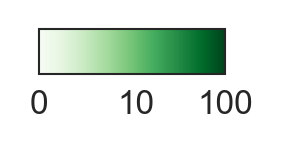

In [92]:
# colorbar
import matplotlib as mpl
cmap=plt.get_cmap("Greens")
bounds=[0,10,100]
fontsize=8
label=""
orientation='horizontal'
norm = mpl.colors.LogNorm(vmin=1, vmax=101)

fig=plt.figure(figsize=(0.8,0.2))
ax=fig.add_subplot(111)
cbar = mpl.colorbar.ColorbarBase(ax, cmap=cmap, norm=norm,
ticks=bounds, orientation=orientation,label=label,)
ax.xaxis.set_ticks([1,11,101])
ax.set_xticklabels([0,10,100])
ax.tick_params(labelsize=fontsize)#,labelleft=True,labelright=False)
plt.savefig(path_to_results+"Supplementary_Figure7_9.png",dpi=300,bbox_inches="tight")

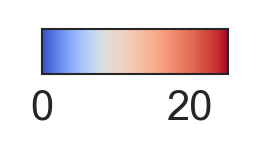

In [90]:
# colorbar
import matplotlib as mpl
cmap=plt.get_cmap(cmap)
bounds=[0,20,40,60]
fontsize=8
label=""
orientation='horizontal'
norm = mpl.colors.TwoSlopeNorm(vmin=vmin, vmax=vmax, vcenter=center)

fig=plt.figure(figsize=(0.8,0.2))
ax=fig.add_subplot(111)
cbar = mpl.colorbar.ColorbarBase(ax, cmap=cmap, norm=norm,
ticks=bounds, orientation=orientation,label=label,)
ax.tick_params(labelsize=fontsize)#,labelleft=True,labelright=False)
plt.savefig(path_to_results+"Supplementary_Figure7_5.png",dpi=300,bbox_inches="tight")

In [80]:
m=np.nanmean(plt_df[value2])*100
print(m)
vmin=0
vmax=25
center=m

8.554939937455933


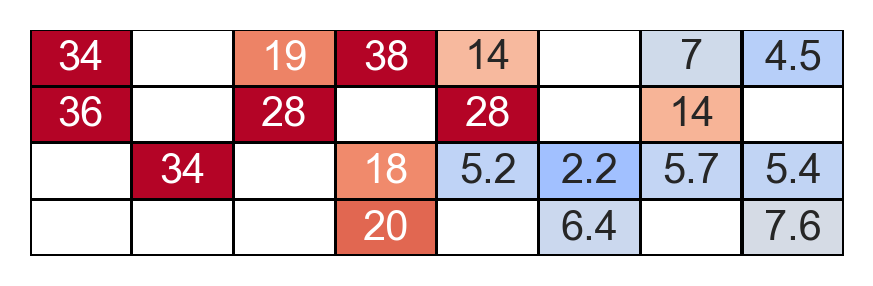

In [86]:
sns_df1=plt_df2.loc[plt_df1.index.isin(brca_cancers),:]*100
sns_df2=plt_df3.loc[plt_df3.index.isin(brca_cancers),:]
N=len(sns_df1)
fig=plt.figure(figsize=(3.5,0.25*N))
ax=fig.add_subplot(111)
ax=sns.heatmap(sns_df1,annot=sns_df1,cmap=cmap,cbar=False,xticklabels=0,vmin=vmin, vmax=vmax, center=center,
               linewidths=0.5,linecolor="k",yticklabels=0, annot_kws={"size":10})
ax.set_ylabel("")
plt.savefig(path_to_results+"Supplementary_Figure7_6.png",dpi=300,bbox_inches="tight")

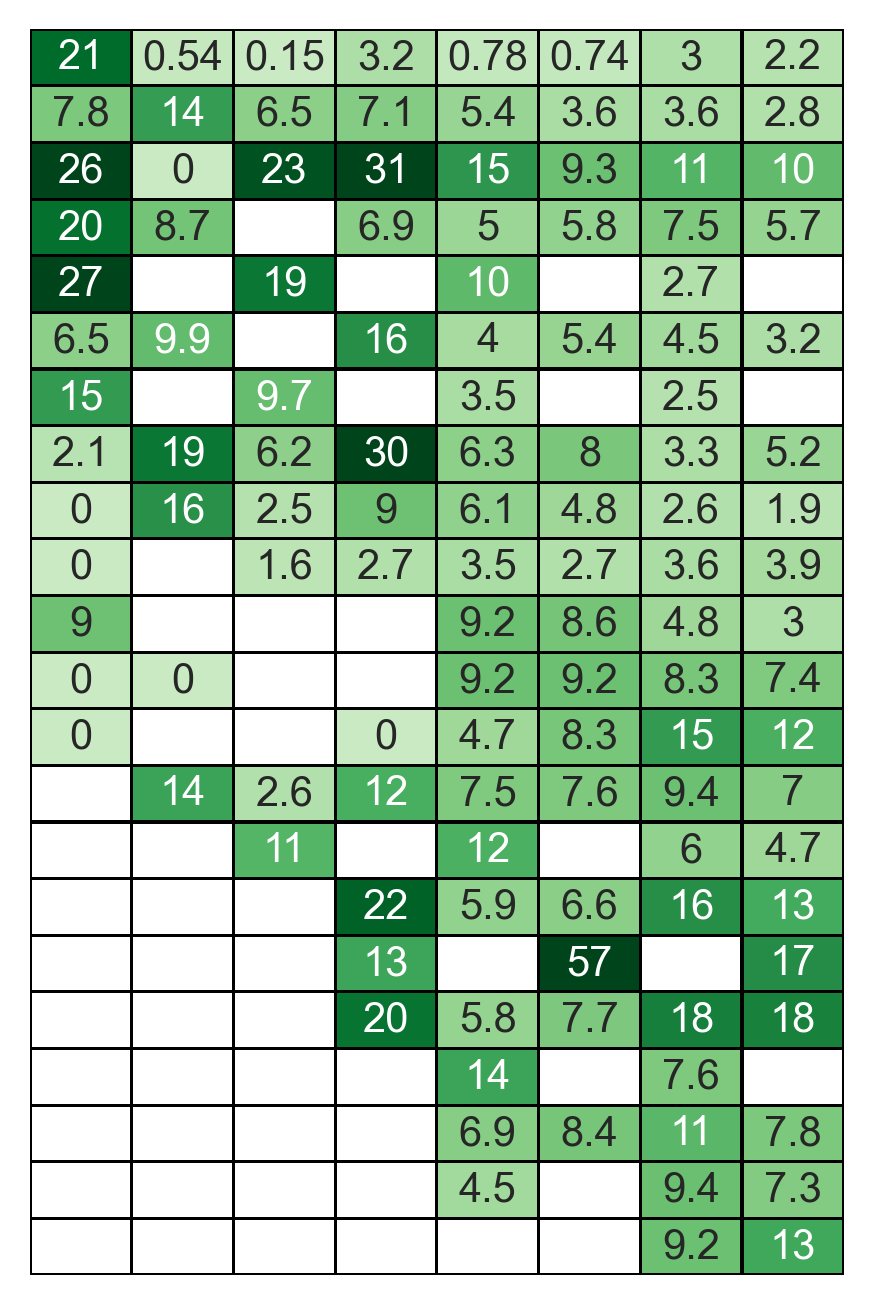

In [82]:
sns_df1=plt_df2.loc[~plt_df1.index.isin(brca_cancers),:]*100
sns_df1[sns_df1<0.01]=0
sns_df2=plt_df3.loc[~plt_df1.index.isin(brca_cancers),:]*100
N=len(sns_df1)
fig=plt.figure(figsize=(3.5,0.25*N))
ax=fig.add_subplot(111)
ax=sns.heatmap(sns_df1,annot=sns_df1,cmap=cmap,cbar=False,xticklabels=0,vmin=vmin, vmax=vmax, center=center,
               linewidths=0.5,linecolor="k",yticklabels=0, annot_kws={"size":10})
ax.set_ylabel("")
plt.savefig(path_to_results+"Supplementary_Figure7_7.png",dpi=300,bbox_inches="tight")

In [87]:
counts=pd.DataFrame(np.sum(int_df3),index=int_df3.columns)
counts=counts.loc[counts.index.isin(brca_cancers),:]
for idx in counts.index:
    print(idx+" ("+str(counts.loc[idx,0])+")")

BRC (1009)
PRAD (493)
PAAD (176)
OV (409)


In [88]:
counts=pd.DataFrame(np.sum(int_df3),index=int_df3.columns)
counts=counts.loc[cancer_order,:]
counts=counts.loc[~counts.index.isin(brca_cancers),:]
for idx in counts.index:
    print(idx+" ("+str(counts.loc[idx,0])+")")

SKCM (438)
BLCA (410)
SARC (234)
LUSC (469)
UCEC (515)
HNSC (502)
CESC (281)
STES (618)
CRC (525)
LUAD (510)
LGG (509)
GBM (385)
ACC (91)
LIHC (358)
THCA (484)
MESO (82)
TGCT (128)
KRC (695)
UCS (57)
CHOL (36)
PCPG (178)
UVM (80)


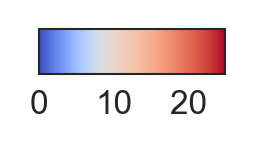

In [89]:
# colorbar
import matplotlib as mpl
cmap=plt.get_cmap("coolwarm")
bounds=[0,10,20]
fontsize=8
label=""
orientation='horizontal'
norm = mpl.colors.TwoSlopeNorm(vmin=vmin, vmax=vmax, vcenter=center)

fig=plt.figure(figsize=(0.8,0.2))
ax=fig.add_subplot(111)
cbar = mpl.colorbar.ColorbarBase(ax, cmap=cmap, norm=norm,
ticks=bounds, orientation=orientation,label=label,)
ax.tick_params(labelsize=fontsize)#,labelleft=True,labelright=False)
plt.savefig(path_to_results+"Supplementary_Figure7_8.png",dpi=300,bbox_inches="tight")

# Figure 2C & 3A in validation dataset

In [276]:
plt_df3=pd.read_csv(path_to_data+"Data_for_Figure2C_3A_validation.tsv",
                    sep="\t",index_col=0)
plt_df3.head()

,Patient,Sample,Sex,Cancer type,Detailed cancer type,Purity,Ploidy,Genome doubled,Hypermutated,Germline BRCA1,...,NtAI,Signature 3,HRD score,HRD_score,aBRCA,sTP53_mut,sTP53_del,sTP53_mutdel,Gender_sTP53m,Gender_aBRCA
Sample_ID,,,,,,,,,,,,,,,,,,,,,
P-0000067-T01,P-0000067,P-0000067-T01-WES,Female,Ovarian cancer,High-grade serous ovarian cancer,0.71,3.7,True,No,0,...,26.0,2.900000e-01,1.147055,66.0,1,1,0,1,Female_TP53m,Female_Biallelic
P-0000117-T01,P-0000117,P-0000117-T01-WES,Male,Esophagogastric cancer,Stomach adenocarcinoma,0.62,2.0,False,No,1,...,17.0,3.600000e-01,0.977029,49.0,1,0,0,0,Male_TP53wt,Male_Biallelic
P-0000122-T01,P-0000122,P-0000122-T01-WES,Female,Uterine sarcoma,Uterine perivascular epithelioid cell tumor,0.96,1.8,False,No,0,...,12.0,5.200000e-02,-0.214029,33.0,1,1,0,1,Female_TP53m,Female_Biallelic
P-0000152-T03,P-0000152,P-0000152-T03-WES,Female,Breast cancer,Invasive breast carcinoma,0.42,3.0,True,No,0,...,15.0,4.600000e-10,-0.282772,36.0,0,0,0,0,Female_TP53wt,Female_HetWt
P-0000184-T02,P-0000184,P-0000184-T02-WES,Male,Bladder cancer,Urethral squamous cell carcinoma,0.60,3.4,True,No,0,...,23.0,1.100000e-10,-0.480646,47.0,0,0,0,0,Male_TP53wt,Male_HetWt


In [277]:
plt_df3["Cancer type"].unique()

array(['Ovarian cancer', 'Esophagogastric cancer', 'Uterine sarcoma',
       'Breast cancer', 'Bladder cancer', 'Hepatobiliary cancer',
       'Prostate cancer', 'Cns cancer', 'Melanoma', 'Colorectal cancer',
       'Glioma', 'Skin cancer, non-melanoma', 'Endometrial cancer',
       'Non-small cell lung cancer', 'Soft tissue sarcoma',
       'Germ cell tumor', 'Gastrointestinal neuroendocrine tumor',
       'Pancreatic cancer', 'Adrenocortical carcinoma',
       'Head and neck cancer', 'Non-hodgkin lymphoma', 'Anal cancer',
       'Bone cancer', 'Small bowel cancer', 'Thyroid cancer',
       'Ampullary carcinoma', 'Small cell lung cancer',
       'Renal cell carcinoma', 'Gastrointestinal stromal tumor',
       'Cancer of unknown primary', 'Salivary gland cancer',
       'Cervical cancer', 'Nerve sheath tumor',
       'Peripheral nervous system', 'Appendiceal cancer',
       'Choroid plexus tumor', 'Mesothelioma', 'Sellar tumor',
       'Vaginal cancer', 'Embryonal tumor', 'Pheochromocy

In [278]:
# exclude blood tumor
plt_df3=plt_df3[~plt_df3["Cancer type"].isin(["Non-hodgkin lymphoma",'Histiocytosis'])]
plt_df3.shape

(813, 28)

In [279]:
# convert cancer type according to TCGA data
dict_nature_tcga_cancer_name={'Adrenocortical carcinoma':"ACC",
                              'Bladder cancer':"BLCA",
                              'Breast cancer':"BRC", 
                              'Colorectal cancer':"CRC", 
                              'Endometrial cancer':"UCEC",
                              'Esophagogastric cancer':"STES", 
                              'Head and neck cancer':"HNSC", 
                              'Hepatobiliary cancer':"LIHC", 
                              'Melanoma':"SKCM",
                              'Mesothelioma':"MESO",
                              'Non-small cell lung cancer':"LUSC", 
                              'Ovarian cancer':"OV",
                              'Pancreatic cancer':"PAAD",
                              'Prostate cancer':"PRAD",
                              'Renal cell carcinoma':"KRC", 
                              'Salivary gland cancer':"HNSC",
                              'Cervical cancer':"CESC",
                              'Soft tissue sarcoma':"SARC", 
                              'Thyroid cancer':"THCA",
                              'Uterine sarcoma':"SARC",
                              'Breast sarcoma':"SARC"}

In [280]:
plt_df3["CancerType"]=plt_df3["Cancer type"].replace(dict_nature_tcga_cancer_name)

In [281]:
mean_by_cancer=plt_df3.groupby("CancerType").mean()[["sTP53_mutdel","HRD_score","Signature 3"]]
mean_by_cancer["Sample"]=plt_df3.groupby("CancerType").count()["Sample"]
mean_by_cancer

,sTP53_mutdel,HRD_score,Signature 3,Sample
CancerType,,,,
ACC,0.500000,12.750000,1.050000e-01,4
Ampullary carcinoma,0.500000,29.500000,2.662500e-01,4
Anal cancer,0.500000,48.500000,1.250000e-01,2
Appendiceal cancer,0.000000,4.000000,1.800000e-10,1
BLCA,0.447368,22.500000,5.449742e-02,38
BRC,0.459854,39.072993,2.001782e-01,137
Bone cancer,0.200000,21.600000,3.060000e-02,5
CESC,0.500000,7.000000,1.732500e-08,2
CRC,0.609756,15.439024,3.205128e-02,41


In [282]:
# curate sample count <=4
mean_by_cancer=mean_by_cancer[mean_by_cancer["Sample"]>=4]

/Users/takamatsushiro/.pyenv/versions/3.8.6/envs/default/lib/python3.8/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


rS = 0.574, p = 1.73e-03


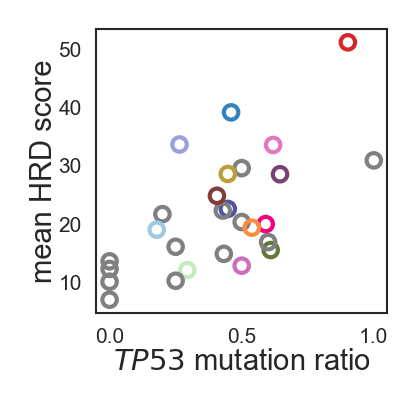

In [283]:
fig = plt.figure(figsize=(1.25,1.25))
ax = fig.add_subplot(1,1,1)
tmp_df=mean_by_cancer
x="sTP53_mutdel"
y="HRD_score"
cancers=tmp_df.index
colors=[ dict_cancer_color[ cancer] if cancer in selected_cancer else "grey" for cancer in cancers]

ax.scatter( tmp_df[x],tmp_df[y],c="None",edgecolors=colors,linewidth=1,s=12)
ax.set_title('',fontsize=16)
ax.set_ylabel('mean HRD score',fontsize=SMALL_SIZE,labelpad=0.1)
ax.set_xlabel('$TP53$ mutation ratio',fontsize=SMALL_SIZE,labelpad=0.2)
ax.tick_params(labelsize=SMALL_SIZE-2)
r,p=stats.spearmanr(tmp_df[x],tmp_df[y])
print("rS = {:.3g}, p = {:.2e}".format(r,p))

plt.savefig(path_to_results+"Figure2C_3.png",bbox_inches="tight")

In [284]:
value="HRD_score"
tmp_df=plt_df3.dropna(subset=[value])
PPP=tmp_df.loc[ (tmp_df["aBRCA"]==1) & (tmp_df["Gender_sTP53m"]=="Female_TP53m"), value].values
PPN=tmp_df.loc[ (tmp_df["aBRCA"]==1) & (tmp_df["Gender_sTP53m"]=="Male_TP53m"), value].values
PNP=tmp_df.loc[ (tmp_df["aBRCA"]==1) & (tmp_df["Gender_sTP53m"]=="Female_TP53wt"), value].values
PNN=tmp_df.loc[ (tmp_df["aBRCA"]==1) & (tmp_df["Gender_sTP53m"]=="Male_TP53wt"), value].values
NPP=tmp_df.loc[ (tmp_df["aBRCA"]==0) & (tmp_df["Gender_sTP53m"]=="Female_TP53m"), value].values
NPN=tmp_df.loc[ (tmp_df["aBRCA"]==0) & (tmp_df["Gender_sTP53m"]=="Male_TP53m"), value].values
NNP=tmp_df.loc[ (tmp_df["aBRCA"]==0) & (tmp_df["Gender_sTP53m"]=="Female_TP53wt"), value].values
NNN=tmp_df.loc[ (tmp_df["aBRCA"]==0) & (tmp_df["Gender_sTP53m"]=="Male_TP53wt"), value].values
data_comp=[PPP,PPN,PNP,PNN,NPP,NPN,NNP,NNN]

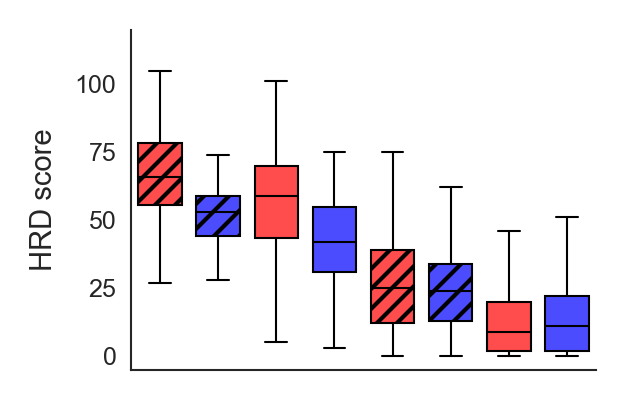

In [285]:
fig = plt.figure(figsize=(2,1.5))
ax = fig.add_subplot(1,1,1)
bp=ax.boxplot(data_comp, showfliers=False,patch_artist=True, 
              widths=0.75)
colors=[(1,0,0,0.7),(0,0,1,0.7)]*4
hatches=["/////","////","",""]*2
# box face color
for b, c,h in zip(bp['boxes'], colors, hatches):
    b.set(linewidth=0.5) 
    b.set(hatch=h) 
    b.set(facecolor=c)
    b.set(edgecolor="k")
# median line
for b, c in zip(bp['medians'], colors):
    b.set(color="k",linewidth=0.5)
for b, c in zip(bp['whiskers'], colors*2):
    b.set(linewidth=0.5)
# caps
for b, c in zip(bp['caps'], colors*2):
    b.set( linewidth=0.5)

ax.set_xlabel('')
ax.set_xticklabels([])
ax.set_ylim(-5,120)
ax.tick_params(labelsize=6)

ax.set_ylabel("HRD score",fontsize=SMALL_SIZE)
ax.spines['top'].set_visible(False)
ax.spines['right' ].set_visible(False)

plt.savefig(path_to_results+"Figure3A_3_1.png",bbox_inches="tight")

In [286]:
_,p1=stats.mannwhitneyu(PPP,PPN)
_,p2=stats.mannwhitneyu(PNP,PNN)
_,p3=stats.mannwhitneyu(NPP,NPN)
_,p4=stats.mannwhitneyu(NNP,NNN)
_,p12=stats.mannwhitneyu( np.concatenate([PPP,PPN]),   np.concatenate([PNP,PNN])  )
_,p34=stats.mannwhitneyu( np.concatenate([NPP,NPN]),   np.concatenate([NNP,NNN])  )
for p in [p1,p2,p3,p4,p12,p34]:
    print( "p = {:.2e}".format(p) )

p = 5.11e-05
p = 1.02e-03
p = 2.65e-01
p = 2.14e-01
p = 9.96e-05
p = 1.07e-21


In [287]:
value="Signature 3"
tmp_df=plt_df3.dropna(subset=[value])
PPP=tmp_df.loc[ (tmp_df["aBRCA"]==1) & (tmp_df["Gender_sTP53m"]=="Female_TP53m"), value].values
PPN=tmp_df.loc[ (tmp_df["aBRCA"]==1) & (tmp_df["Gender_sTP53m"]=="Male_TP53m"), value].values
PNP=tmp_df.loc[ (tmp_df["aBRCA"]==1) & (tmp_df["Gender_sTP53m"]=="Female_TP53wt"), value].values
PNN=tmp_df.loc[ (tmp_df["aBRCA"]==1) & (tmp_df["Gender_sTP53m"]=="Male_TP53wt"), value].values
NPP=tmp_df.loc[ (tmp_df["aBRCA"]==0) & (tmp_df["Gender_sTP53m"]=="Female_TP53m"), value].values
NPN=tmp_df.loc[ (tmp_df["aBRCA"]==0) & (tmp_df["Gender_sTP53m"]=="Male_TP53m"), value].values
NNP=tmp_df.loc[ (tmp_df["aBRCA"]==0) & (tmp_df["Gender_sTP53m"]=="Female_TP53wt"), value].values
NNN=tmp_df.loc[ (tmp_df["aBRCA"]==0) & (tmp_df["Gender_sTP53m"]=="Male_TP53wt"), value].values
data_comp=[PPP,PPN,PNP,PNN,NPP,NPN,NNP,NNN]

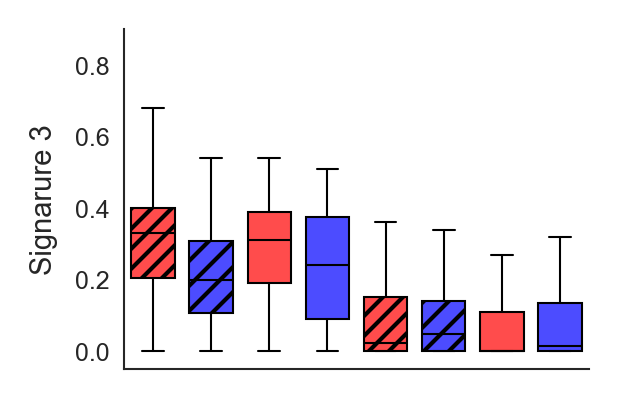

In [288]:
fig = plt.figure(figsize=(2,1.5))
ax = fig.add_subplot(1,1,1)
bp=ax.boxplot(data_comp, showfliers=False,patch_artist=True, 
              widths=0.75)
colors=[(1,0,0,0.7),(0,0,1,0.7)]*4
hatches=["/////","////","",""]*2
# box face color
for b, c,h in zip(bp['boxes'], colors, hatches):
    b.set(linewidth=0.5) 
    b.set(hatch=h) 
    b.set(facecolor=c)
    b.set(edgecolor="k")
# median line
for b, c in zip(bp['medians'], colors):
    b.set(color="k",linewidth=0.5)
for b, c in zip(bp['whiskers'], colors*2):
    b.set(linewidth=0.5)
# caps
for b, c in zip(bp['caps'], colors*2):
    b.set( linewidth=0.5)

ax.set_xlabel('')
ax.set_xticklabels([])
ax.set_ylim(-0.05,0.9)
ax.tick_params(labelsize=6)

ax.set_ylabel("Signarure 3",fontsize=SMALL_SIZE)
ax.spines['top'].set_visible(False)
ax.spines['right' ].set_visible(False)

plt.savefig(path_to_results+"Figure3A_3_2.png",bbox_inches="tight")

In [289]:
_,p1=stats.mannwhitneyu(PPP,PPN)
_,p2=stats.mannwhitneyu(PNP,PNN)
_,p3=stats.mannwhitneyu(NPP,NPN)
_,p4=stats.mannwhitneyu(NNP,NNN)
_,p12=stats.mannwhitneyu( np.concatenate([PPP,PPN]),   np.concatenate([PNP,PNN])  )
_,p34=stats.mannwhitneyu( np.concatenate([NPP,NPN]),   np.concatenate([NNP,NNN])  )
for p in [p1,p2,p3,p4,p12,p34]:
    print( "p = {:.2e}".format(p) )

p = 2.56e-04
p = 4.66e-02
p = 3.03e-01
p = 1.32e-01
p = 3.62e-01
p = 2.80e-02
